In [70]:
from _config import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

In [71]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

### Start with Spring (1)

In [72]:
#Start with spring and work our way down to winter
season = 1
season_year = 2004
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2004-03-01 to 2004-05-31
Columns: 286 entries, 10000009 to 22000047
dtypes: float64(286)
memory usage: 206.3 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2004-03-01  0.760794  0.641299  0.464475  0.758102  0.481425  1.271004   
2004-03-02  0.803043  0.650130  0.464198  0.776230  0.492064  1.253554   
2004-03-03  0.806563  0.652495  0.435253  0.783068  0.476295  1.234395   
2004-03-04  0.763520  0.642344  0.396642  0.756842  0.461051  1.193856   
2004-03-05  0.738767  0.631942  0.456221  0.762197  0.456068  1.151450   
...              ...       ...       ...       ...       ...       ...   
2004-05-27  0.641679  0.663414  0.218794  0.691704  0.355376  0.532756   
2004-05-28  0.633949  0.649422  0.202101  0.684885  0.379430  0.515111   
2004-05-29  0.620366  0.627618  0.196896  0.670952  0.387209  0.505545   
2004-05-30  0.600472  0.619918  0.196373  0.670649  0.385948  0.503811   
2004-05-31  0.576048  0.613125  0.196527  0.670480  0.385254  0.494276   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2004-03-01  1.026230  0.574587  

          2004-03-01  2004-03-02  2004-03-03  2004-03-04  2004-03-05  \
10000009   -0.059687   -0.058274   -0.056889   -0.056918   -0.056690   
10000010   -0.069949   -0.071309   -0.070154   -0.067493   -0.066044   
10000011   -0.085135   -0.087158   -0.088860   -0.088935   -0.081431   
10000014   -0.059918   -0.060560   -0.058912   -0.057501   -0.054638   
10000016   -0.083680   -0.084782   -0.085326   -0.083314   -0.081444   
...              ...         ...         ...         ...         ...   
7000003    -0.061917   -0.061060   -0.061247   -0.062388   -0.063488   
8000001    -0.055373   -0.054153   -0.054133   -0.054509   -0.055395   
9000001     0.017621    0.012141    0.010844    0.012374    0.012374   
9000015     0.012497    0.007288    0.006207    0.007941    0.008151   
22000047   -0.081718   -0.084153   -0.084853   -0.081505   -0.078771   

          2004-03-06  2004-03-07  2004-03-08  2004-03-09  2004-03-10  ...  \
10000009   -0.056301   -0.056125   -0.055729   -0.055916  

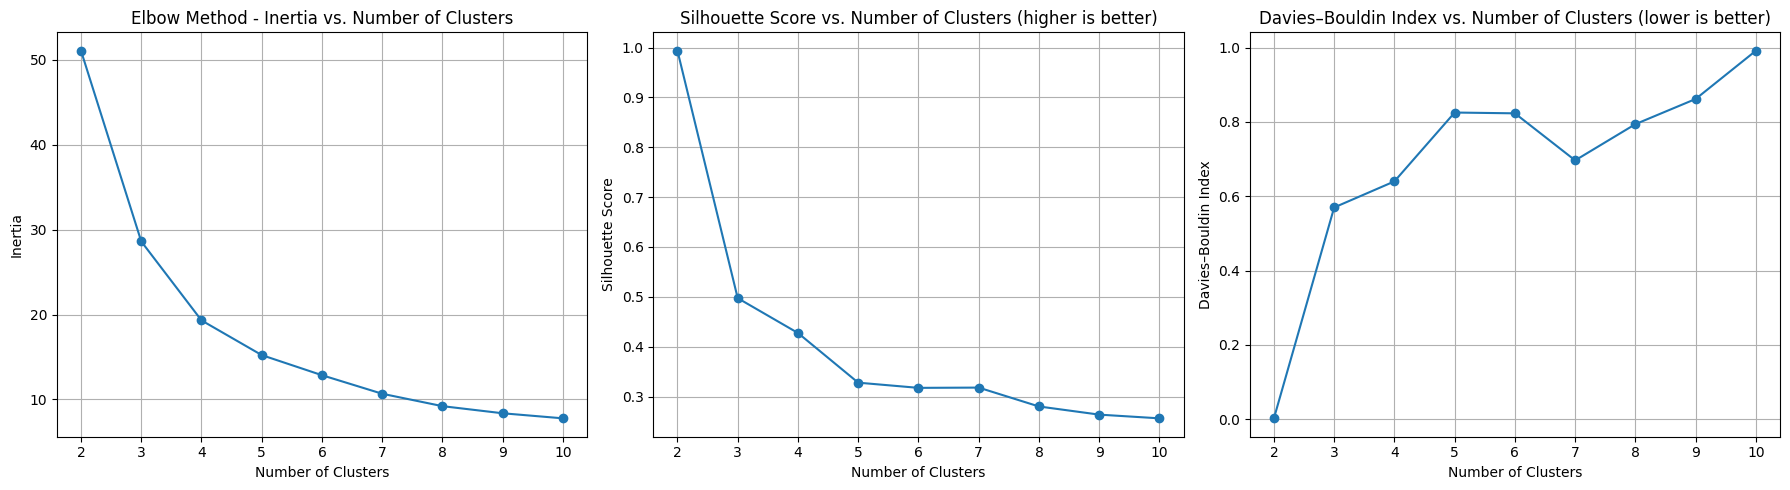

In [73]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
#import numpy as np

# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  11000011  \
2004-03-01  0.760794  0.641299  0.464475  0.758102  0.481425  1.271004   
2004-03-02  0.803043  0.650130  0.464198  0.776230  0.492064  1.253554   
2004-03-03  0.806563  0.652495  0.435253  0.783068  0.476295  1.234395   
2004-03-04  0.763520  0.642344  0.396642  0.756842  0.461051  1.193856   
2004-03-05  0.738767  0.631942  0.456221  0.762197  0.456068  1.151450   
...              ...       ...       ...       ...       ...       ...   
2004-05-27  0.641679  0.663414  0.218794  0.691704  0.355376  0.532756   
2004-05-28  0.633949  0.649422  0.202101  0.684885  0.379430  0.515111   
2004-05-29  0.620366  0.627618  0.196896  0.670952  0.387209  0.505545   
2004-05-30  0.600472  0.619918  0.196373  0.670649  0.385948  0.503811   
2004-05-31  0.576048  0.613125  0.196527  0.670480  0.385254  0.494276   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2004-03-01  1.026230  0.574587  

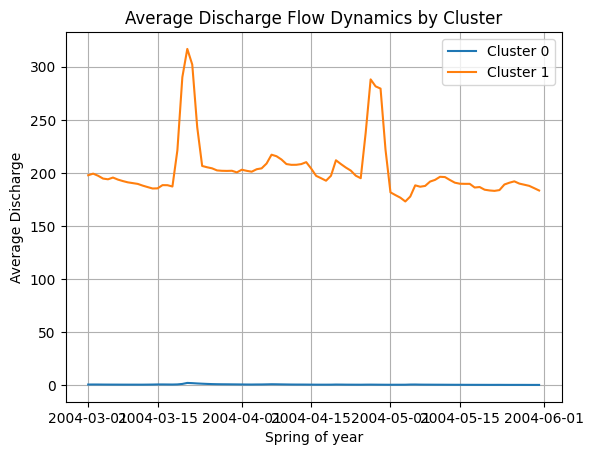

In [74]:
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure()
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Spring of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)
#print(out_path)

In [76]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  11000011  \
2004-03-01  0.760794  0.641299  0.464475  0.758102  0.481425  1.271004   
2004-03-02  0.803043  0.650130  0.464198  0.776230  0.492064  1.253554   
2004-03-03  0.806563  0.652495  0.435253  0.783068  0.476295  1.234395   
2004-03-04  0.763520  0.642344  0.396642  0.756842  0.461051  1.193856   
2004-03-05  0.738767  0.631942  0.456221  0.762197  0.456068  1.151450   
...              ...       ...       ...       ...       ...       ...   
2004-05-27  0.641679  0.663414  0.218794  0.691704  0.355376  0.532756   
2004-05-28  0.633949  0.649422  0.202101  0.684885  0.379430  0.515111   
2004-05-29  0.620366  0.627618  0.196896  0.670952  0.387209  0.505545   
2004-05-30  0.600472  0.619918  0.196373  0.670649  0.385948  0.503811   
2004-05-31  0.576048  0.613125  0.196527  0.670480  0.385254  0.494276   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2004-03-01  1.026230  0.574587  0.887214  0.927404  ...  1.137219  0.410689   
2004-03-02  1.035816  0.598090  0.924003  0.946990  ...  1.152923  0.427657   
2004-03-03  1.001420  0.578744  0.904706  0.947518  ...  1.132026  0.414773   
2004-03-04  0.935949  0.542846  0.854593  0.919661  ...  1.104204  0.360316   
2004-03-05  0.895217  0.529696  0.831082  0.905438  ...  1.077619  0.341967   
...              ...       ...       ...       ...  ...       ...       ...   
2004-05-27  0.597216  0.422684  0.584937  0.728737  ...  0.044143  0.094043   
2004-05-28  0.588107  0.412104  0.572921  0.701164  ...  0.037219  0.085958   
2004-05-29  0.587183  0.404773  0.564596  0.673913  ...  0.025719  0.078482   
2004-05-30  0.575170  0.397140  0.555927  0.663894  ...  0.029676  0.082020   
2004-05-31  0.566184  0.389809  0.547602  0.661414  ...  0.034251  0.078677   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2004-03-01  0.439806  0.444583  0.507987  0.734824  0.811026  1.660946   
2004-03-02  0.486644  0.423492  0.529625  0.770357  0.851385  1.629100   
2004-03-03  0.484154  0.472206  0.551772  0.755950  0.838565  1.593211   
2004-03-04  0.414370  0.490507  0.510988  0.700839  0.791122  1.557530   
2004-03-05  0.386247  0.649223  0.486408  0.661134  0.753555  1.527486   
...              ...       ...       ...       ...       ...       ...   
2004-05-27  0.056057  0.084017  0.071344  0.321875  0.377011  1.025047   
2004-05-28  0.051648  0.077682  0.062405  0.296106  0.354270  0.997074   
2004-05-29  0.048372  0.072939  0.053778  0.282248  0.342039  0.974698   
2004-05-30  0.045978  0.070618  0.049011  0.267816  0.329304  0.970059   
2004-05-31  0.043186  0.069679  0.041518  0.258242  0.320854  0.958555   

             9000015  22000047  
2004-03-01  1.601281  0.504267  
2004-03-02  1.572166  0.499449  
2004-03-03  1.539354  0.481784  
2004-03-04  1.506733  0.481784  
2004-03-05  1.479264  0.486602  
...              ...       ...  
2004-05-27  1.019908  0.475360  
2004-05-28  0.994333  0.473754  
2004-05-29  0.973876  0.467331  
2004-05-30  0.969636  0.459301  
2004-05-31  0.959117  0.454483  

[92 rows x 286 columns]

<Axes: >

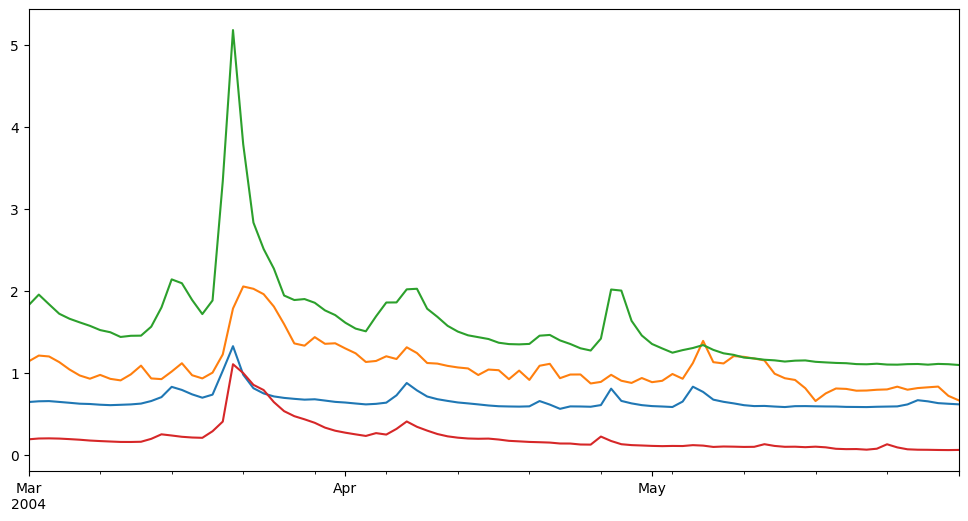

In [77]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

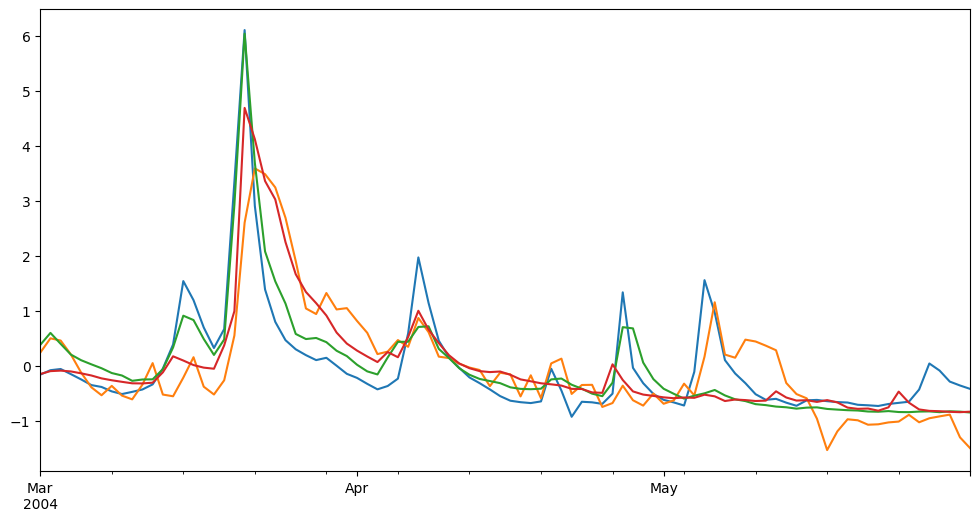

In [78]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

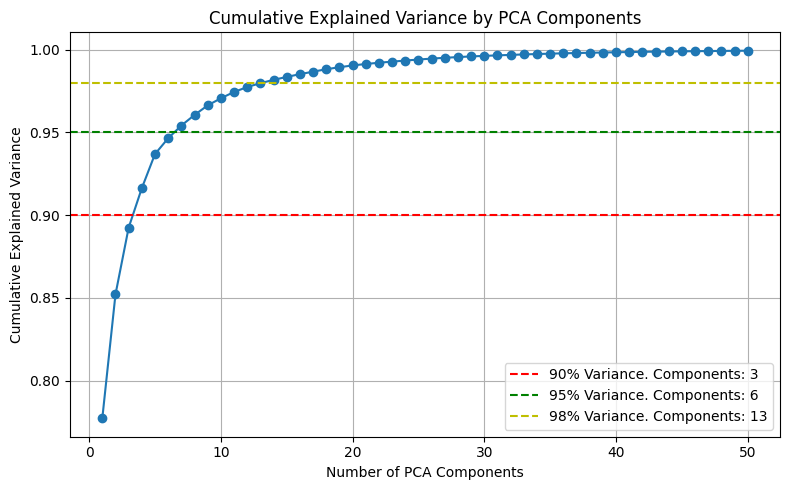

In [79]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [80]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[  1.74417248,   3.22580456,   5.28017705, ...,   0.25246336,
         -0.4891764 ,  -0.3579651 ],
       [  2.84396598,   2.21871363,   5.24448188, ...,   0.44363232,
         -0.78330561,  -0.47892527],
       [  2.18991484,   2.47119828,   4.95347431, ...,   0.21466812,
         -0.55648644,  -0.34507568],
       ...,
       [-16.65752362,  -2.3908221 ,  -1.78336446, ...,  -0.36396335,
         -0.31269205,   0.19560918],
       [-17.13295697,  -2.47665082,  -1.80515939, ...,  -0.24404157,
         -0.23446089,   0.19202492],
       [-17.53734291,  -2.55309009,  -1.81716308, ...,  -0.14558778,
         -0.22968298,   0.21891656]], shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_37824\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


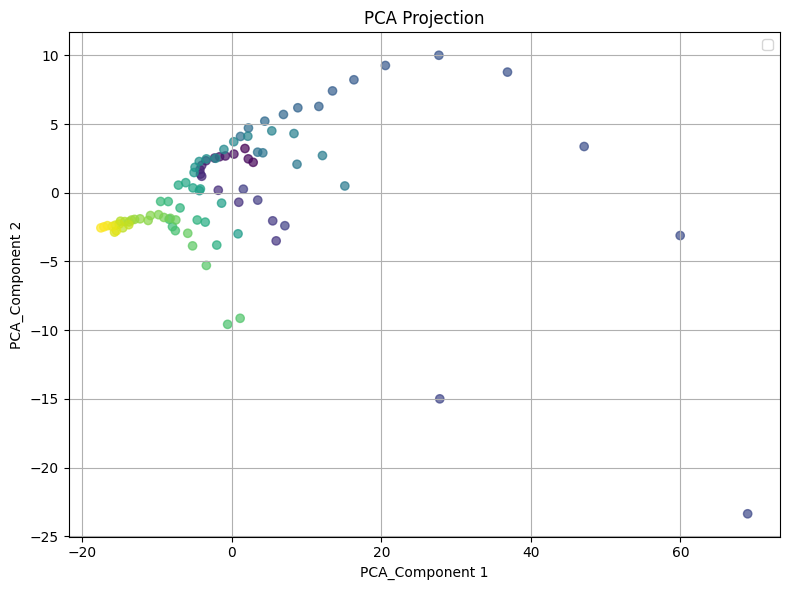

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_37824\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


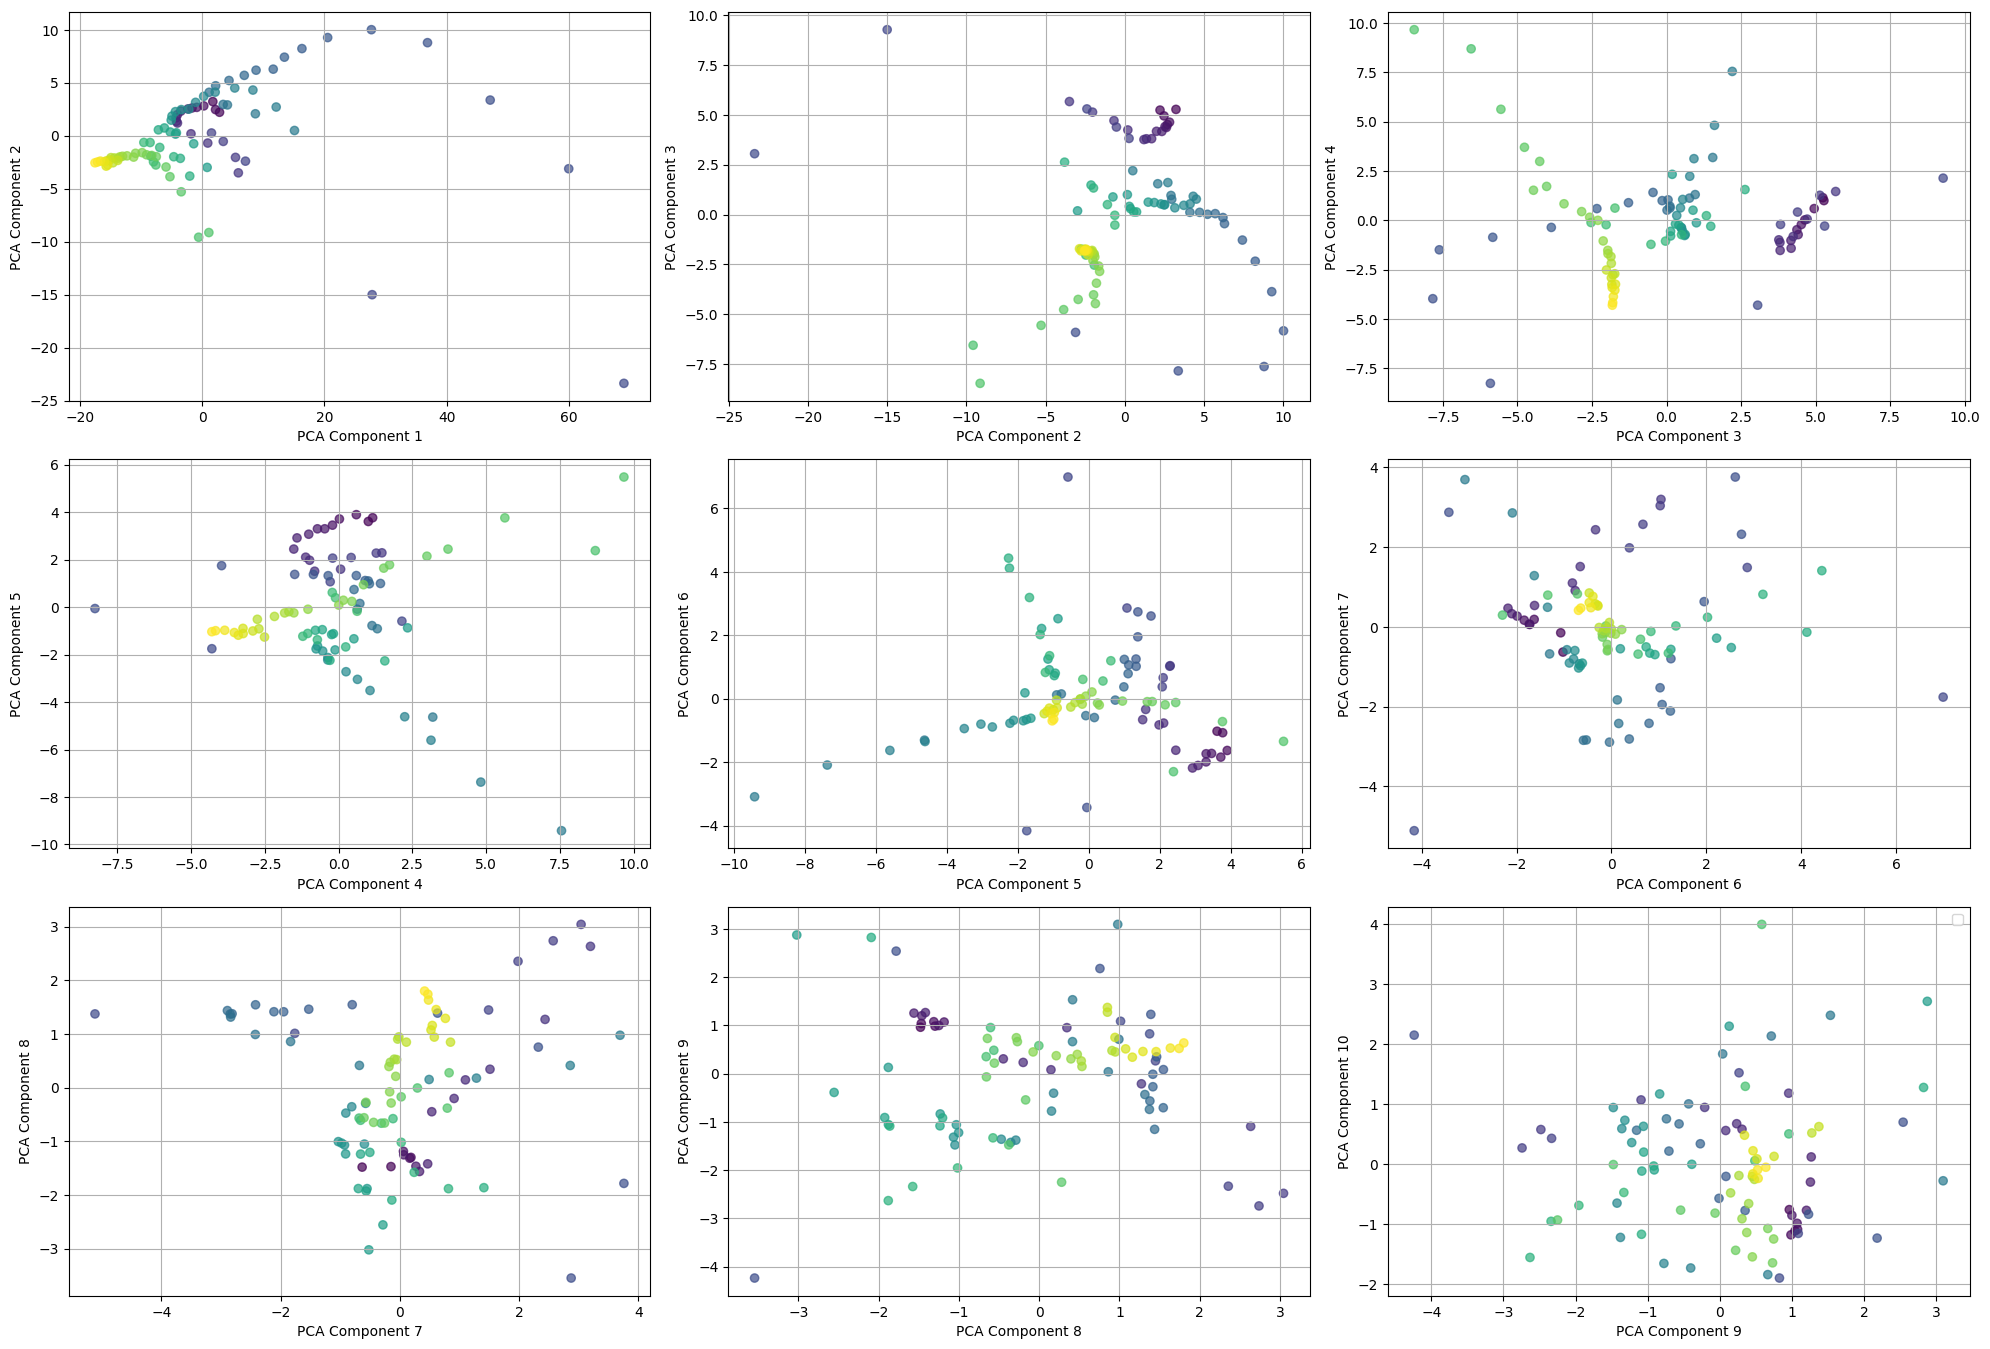

In [82]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [83]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.341
KMeans Davies-Bouldin Index is 0.920


<Axes: xlabel='k'>

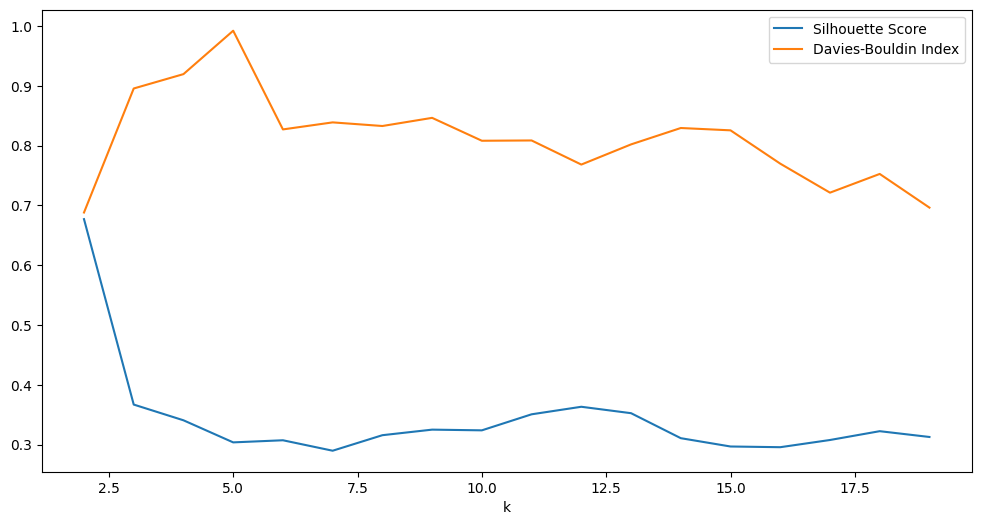

In [84]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         1     89               NaN   
2    1.01            3         3     80         -0.251020   
3    1.27            3         3     75         -0.183717   
4    1.52            3         4     68         -0.169002   
5    1.78            3         3     65         -0.087069   
6    2.03            3         5     55         -0.056797   
7    2.29            3         6     50         -0.010597   
8    2.54            3         5     48          0.012972   
9    2.80            3         6     40          0.011982   
10   3.05            3         6     36          0.051571   
11   3.31            3         7     27          0.107844   
12   3.56            3         6     23          0.133184   
13   3.82            3         6     20          0.152474   
14   4.07            3         6     19          0.159506   
15   4.33            3         6     16          0.142919   
16   4.58            3         4     16          0.214730   
17   4.84            3         3     15          0.199252   
18   5.09            3         3     15          0.199252   
19   5.35            3         3     15          0.199252   
20   5.60            3         3     15          0.199252   
21   5.86            3         3     13          0.193180   
22   6.11            3         2     13          0.094604   
23   6.37            3         1     13               NaN   
24   6.62            3         1     10               NaN   
25   6.88            3         1     10               NaN   
26   7.13            3         1     10               NaN   
27   7.39            3         1      9               NaN   
28   7.64            3         1      9               NaN   
29   7.90            3         1      9               NaN   
30   8.15            3         1      8               NaN   
31   8.41            3         1      7               NaN   
32   8.66            3         1      6               NaN   
33   8.92            3         1      6               NaN   
34   9.17            3         1      6               NaN   
35   9.43            3         1      5               NaN   
36   9.68            3         1      5               NaN   
37   9.94            3         1      4               NaN   
38  10.19            3         1      4               NaN   
39  10.45            3         1      4               NaN   
40  10.70            3         1      4               NaN   
41  10.96            3         1      4               NaN   
42  11.21            3         1      4               NaN   
43  11.47            3         1      4               NaN   
44  11.72            3         1      4               NaN   
45  11.98            3         1      4               NaN   
46  12.23            3         1      4               NaN   
47  12.49            3         1      4               NaN   
48  12.74            3         1      4               NaN   
49  13.00            3         1      4               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2               1.272546  
3               1.160916  
4               1.277806  
5               1.432275  
6               1.454764  
7               1.355881  
8               1.347788  
9               1.353413  
10              1.229025  
11              1.601518  
12              1.541172  
13              1.449105  
14              1.400124  
15              1.360087  
16              1.461449  
17              1.424573  
18              1.424573  
19              1.424573  
20              1.424573  
21              1.502014  
22              1.564314  
23                   NaN  
24                   NaN  
25                   NaN  
26                   NaN  
27                   NaN  
28                   NaN  
29                   NaN  
30                   NaN  
31                   NaN  
32 

<Axes: xlabel='eps'>

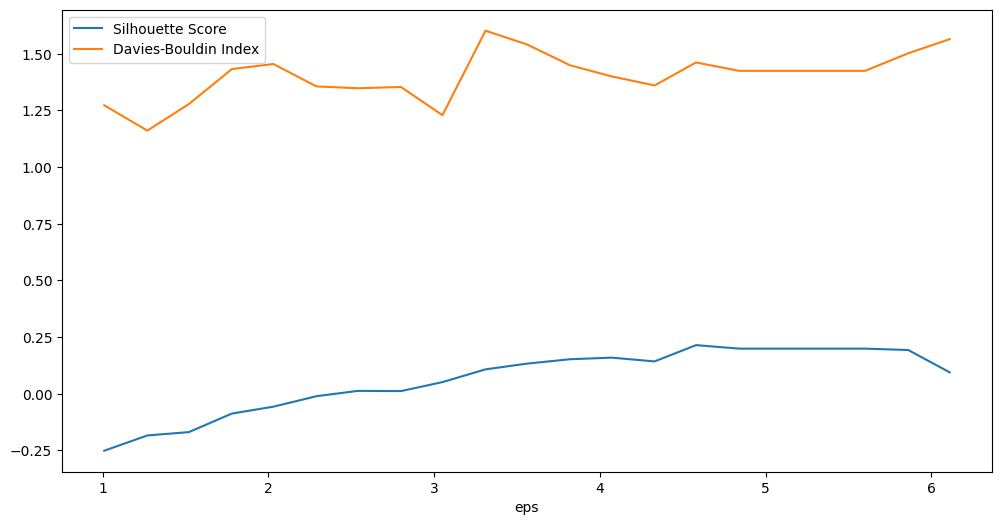

In [85]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

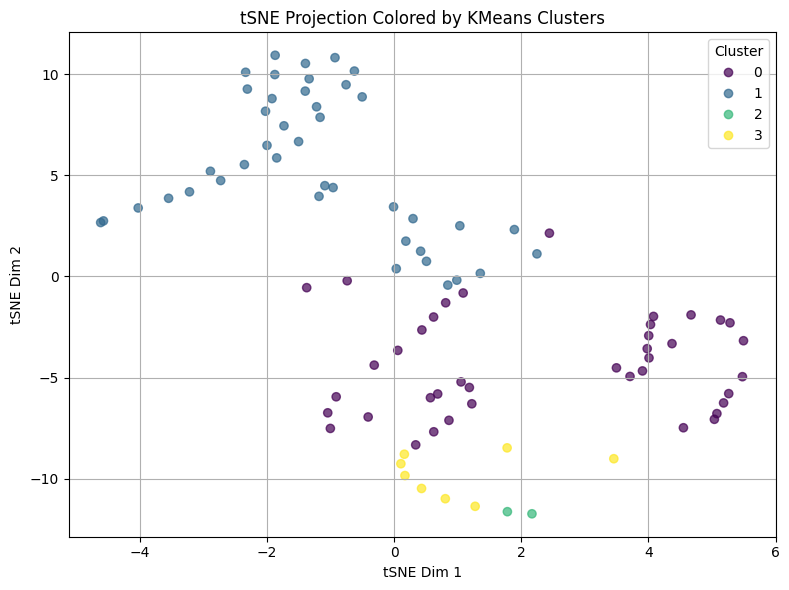

In [86]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2        35    135          0.390021   
1    0.05            2        39    111          0.182351   
2    0.06            2        37     89          0.100334   
3    0.06            2        29     78          0.116628   
4    0.07            2        22     75          0.082345   
..    ...          ...       ...    ...               ...   
195  0.98            2         2      2          0.827073   
196  0.99            2         2      2          0.827073   
197  0.99            2         2      2          0.827073   
198  1.00            2         2      2          0.827073   
199  1.00            2         2      2          0.827073   

     Davies-Bouldin Index  
0                0.537471  
1                0.672601  
2                0.707571  
3                0.783513  
4                0.727249  
..                    ...  
195              0.213013  
196              0.213013  
197              0.213013  
198              0.213013  
199              0.213013  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

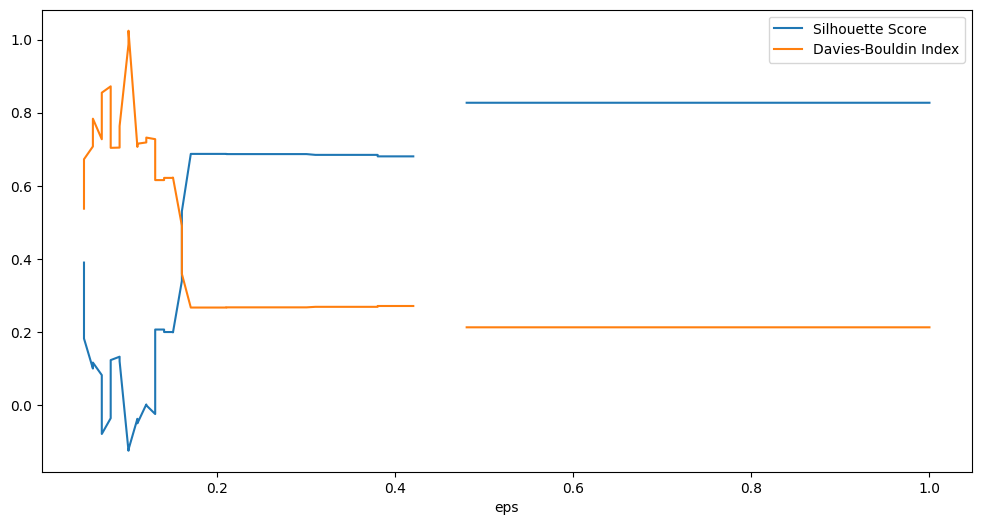

In [87]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Summer (2)

In [88]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [89]:
#Start with spring and work our way down to winter
season = 2
season_year = 2004
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2004-06-01 to 2004-08-31
Columns: 283 entries, 10000009 to 22000047
dtypes: float64(283)
memory usage: 204.1 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2004-06-01  0.563202  0.609189  0.192769  0.656095  0.372491  0.481476   
2004-06-02  0.550902  0.603483  0.191814  0.650663  0.374026  0.471104   
2004-06-03  0.548601  0.596741  0.191260  0.655097  0.370914  0.457194   
2004-06-04  0.553524  0.586599  0.192461  0.664875  0.363009  0.453863   
2004-06-05  0.566145  0.579745  0.194894  0.667681  0.353042  0.447439   
...              ...       ...       ...       ...       ...       ...   
2004-08-27  1.040102  0.483681  0.140319  0.813326  0.406553  0.557624   
2004-08-28  0.739192  0.486313  0.140165  0.694590  0.400687  0.591225   
2004-08-29  0.608178  0.475429  0.132650  0.590606  0.366352  0.613605   
2004-08-30  0.527568  0.468506  0.140196  0.576894  0.361327  0.640135   
2004-08-31  0.526029  0.498251  0.130617  0.678930  0.359287  0.666526   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2004-06-01  0.558877  0.383083  

          2004-06-01  2004-06-02  2004-06-03  2004-06-04  2004-06-05  \
10000009   -0.044837   -0.045558   -0.044944   -0.045419   -0.044589   
10000010   -0.040604   -0.040765   -0.040524   -0.042391   -0.043334   
10000011   -0.078936   -0.078293   -0.077753   -0.078478   -0.078867   
10000014   -0.036286   -0.036464   -0.035166   -0.035224   -0.035215   
10000016   -0.062392   -0.061682   -0.061258   -0.062863   -0.064265   
...              ...         ...         ...         ...         ...   
7000003    -0.074037   -0.074354   -0.074439   -0.076114   -0.077184   
8000001    -0.068141   -0.068397   -0.068358   -0.069518   -0.069957   
9000001    -0.009813   -0.011043   -0.010939   -0.012392   -0.012778   
9000015    -0.009644   -0.010765   -0.010575   -0.011993   -0.012347   
22000047   -0.055880   -0.055958   -0.055207   -0.054340   -0.055640   

          2004-06-06  2004-06-07  2004-06-08  2004-06-09  2004-06-10  ...  \
10000009   -0.045067   -0.045565   -0.045579   -0.048016  

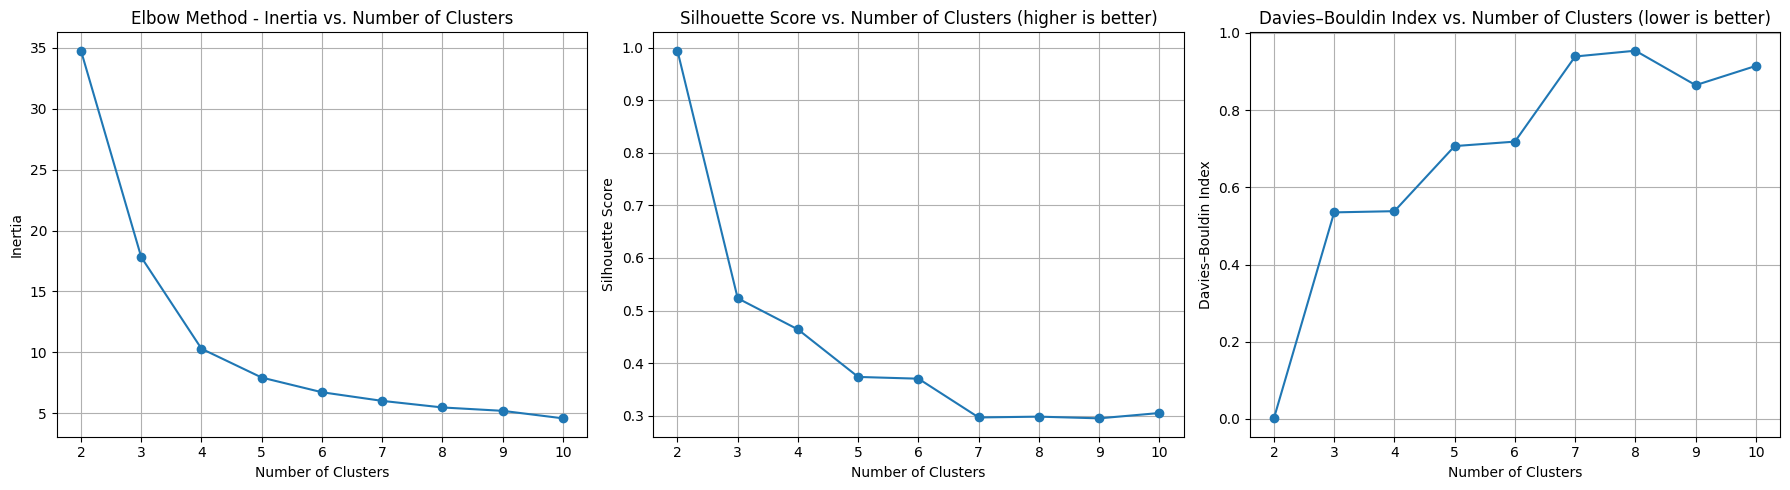

In [90]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  11000011  \
2004-06-01  0.563202  0.609189  0.192769  0.656095  0.372491  0.481476   
2004-06-02  0.550902  0.603483  0.191814  0.650663  0.374026  0.471104   
2004-06-03  0.548601  0.596741  0.191260  0.655097  0.370914  0.457194   
2004-06-04  0.553524  0.586599  0.192461  0.664875  0.363009  0.453863   
2004-06-05  0.566145  0.579745  0.194894  0.667681  0.353042  0.447439   
...              ...       ...       ...       ...       ...       ...   
2004-08-27  1.040102  0.483681  0.140319  0.813326  0.406553  0.557624   
2004-08-28  0.739192  0.486313  0.140165  0.694590  0.400687  0.591225   
2004-08-29  0.608178  0.475429  0.132650  0.590606  0.366352  0.613605   
2004-08-30  0.527568  0.468506  0.140196  0.576894  0.361327  0.640135   
2004-08-31  0.526029  0.498251  0.130617  0.678930  0.359287  0.666526   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2004-06-01  0.558877  0.383083  

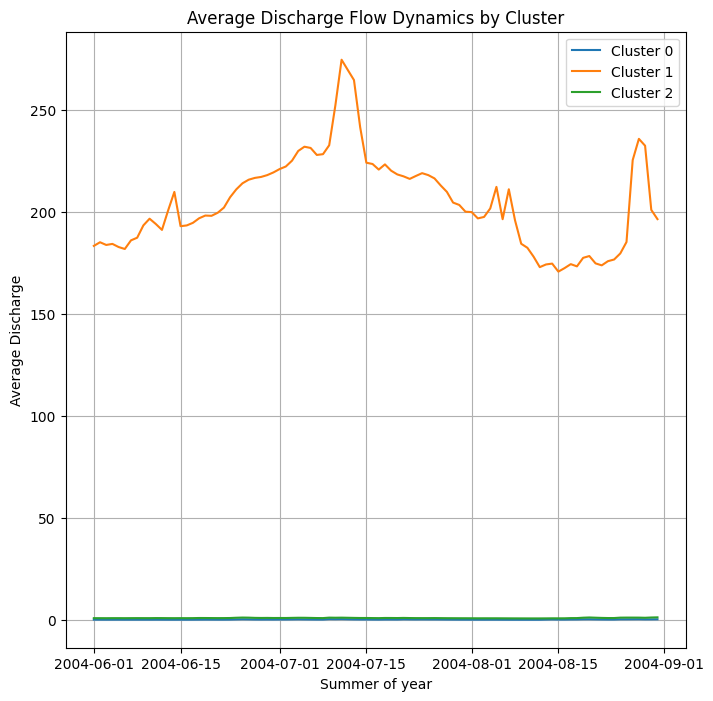

In [91]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Summer of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [93]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  11000011  \
2004-06-01  0.563202  0.609189  0.192769  0.656095  0.372491  0.481476   
2004-06-02  0.550902  0.603483  0.191814  0.650663  0.374026  0.471104   
2004-06-03  0.548601  0.596741  0.191260  0.655097  0.370914  0.457194   
2004-06-04  0.553524  0.586599  0.192461  0.664875  0.363009  0.453863   
2004-06-05  0.566145  0.579745  0.194894  0.667681  0.353042  0.447439   
...              ...       ...       ...       ...       ...       ...   
2004-08-27  1.040102  0.483681  0.140319  0.813326  0.406553  0.557624   
2004-08-28  0.739192  0.486313  0.140165  0.694590  0.400687  0.591225   
2004-08-29  0.608178  0.475429  0.132650  0.590606  0.366352  0.613605   
2004-08-30  0.527568  0.468506  0.140196  0.576894  0.361327  0.640135   
2004-08-31  0.526029  0.498251  0.130617  0.678930  0.359287  0.666526   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2004-06-01  0.558877  0.383083  0.539963  0.658983  ...  0.025225  0.066225   
2004-06-02  0.536221  0.377869  0.534041  0.655579  ...  0.018919  0.063153   
2004-06-03  0.523503  0.369707  0.506486  0.651595  ...  0.017558  0.059556   
2004-06-04  0.541444  0.376962  0.520381  0.658739  ...  0.021886  0.056088   
2004-06-05  0.535795  0.353610  0.530175  0.654758  ...  0.025967  0.066423   
...              ...       ...       ...       ...  ...       ...       ...   
2004-08-27  0.986937  0.458279  0.597248  0.892461  ...  0.012118  0.071382   
2004-08-28  0.875801  0.419132  0.562047  0.893342  ...  0.011871  0.062297   
2004-08-29  0.759195  0.355801  0.505101  0.863959  ...  0.012365  0.054883   
2004-08-30  0.786122  0.370236  0.518081  0.837570  ...  0.012612  0.102566   
2004-08-31  0.822917  0.363661  0.512169  0.830523  ...  0.013725  0.185583   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2004-06-01  0.040512  0.063826  0.031853  0.245994  0.310046  0.943690   
2004-06-02  0.037382  0.060885  0.026649  0.235026  0.300366  0.929521   
2004-06-03  0.034804  0.059328  0.022036  0.227349  0.293591  0.918967   
2004-06-04  0.032957  0.054837  0.016320  0.218275  0.290321  0.914253   
2004-06-05  0.035589  0.055147  0.024268  0.213124  0.291394  0.910690   
...              ...       ...       ...       ...       ...       ...   
2004-08-27  0.139292  0.047465  0.212329  0.218009  0.472155  0.869540   
2004-08-28  0.086632  0.036921  0.132058  0.222215  0.443864  0.845310   
2004-08-29  0.052803  0.029551  0.080490  0.215198  0.418016  0.809803   
2004-08-30  0.046659  0.067896  0.071125  0.209466  0.402044  0.775401   
2004-08-31  0.041404  0.172462  0.063113  0.214841  0.412123  0.844197   

             9000015  22000047  
2004-06-01  0.945527  0.443241  
2004-06-02  0.932573  0.436818  
2004-06-03  0.922924  0.436818  
2004-06-04  0.918614  0.456089  
2004-06-05  0.915356  0.446453  
...              ...       ...  
2004-08-27  0.877736  0.669680  
2004-08-28  0.855583  0.619895  
2004-08-29  0.823120  0.618290  
2004-08-30  0.791668  0.732312  
2004-08-31  0.854565  0.847940  

[92 rows x 283 columns]

<Axes: >

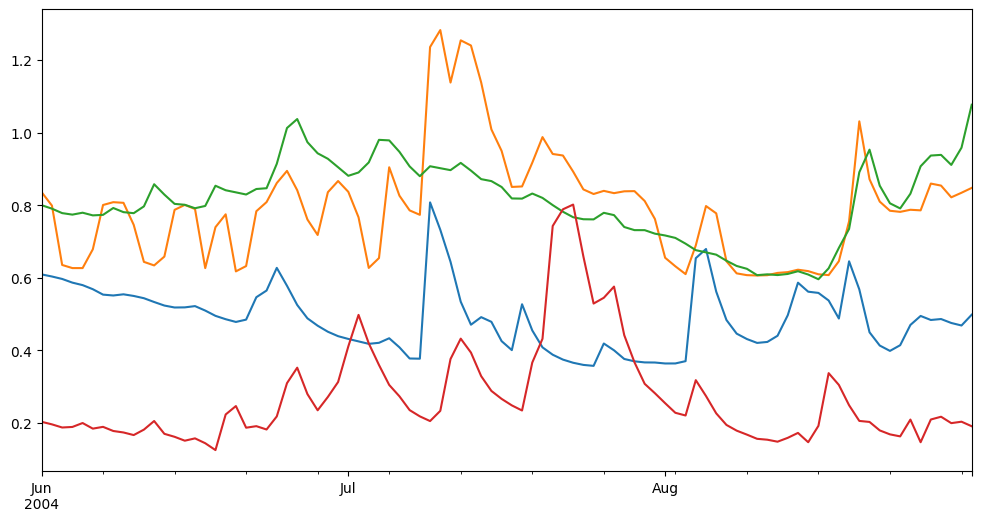

In [94]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

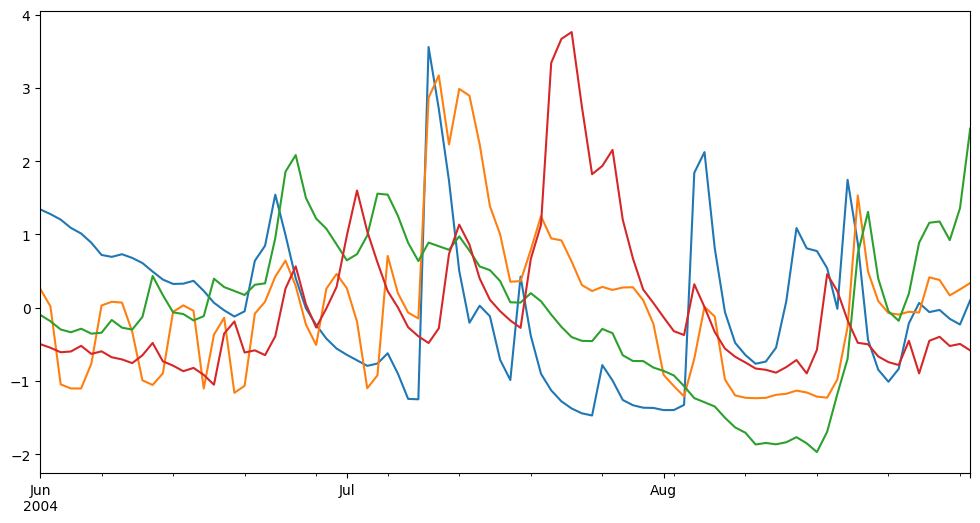

In [95]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

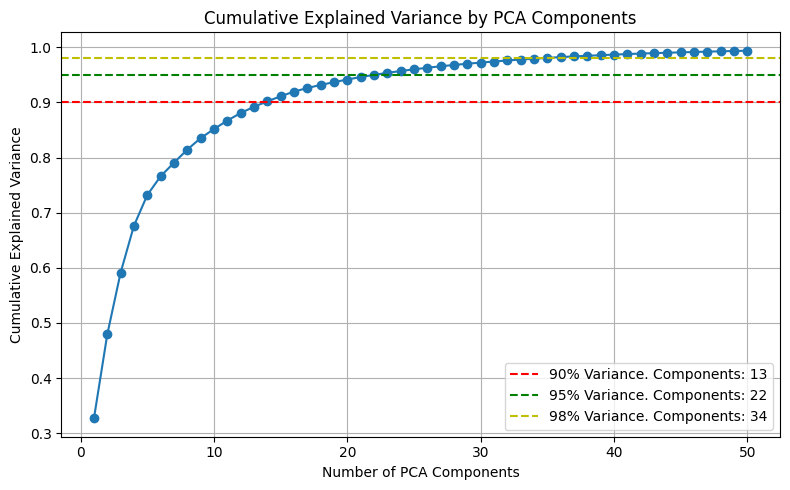

In [96]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [97]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ -4.27634972,  -2.40283805,  -5.07853622, ...,   1.84897311,
          0.3110826 ,   1.56526986],
       [ -5.06991038,  -2.5640418 ,  -5.31687938, ...,   1.98343428,
          0.43523393,   1.5007687 ],
       [ -6.13676587,  -2.86378466,  -5.48907242, ...,   1.35430608,
          0.1159538 ,   1.13528058],
       ...,
       [ 10.47470293, -10.50712076,   6.53186899, ...,   0.12365396,
         -0.96716451,   0.03037127],
       [ 14.64445072, -12.30852201,   6.70201207, ...,  -0.02823215,
          0.62075631,   0.68892112],
       [ 19.58262375, -13.18950034,   8.88971934, ...,  -0.07026556,
          1.23458684,  -1.21548231]], shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_37824\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


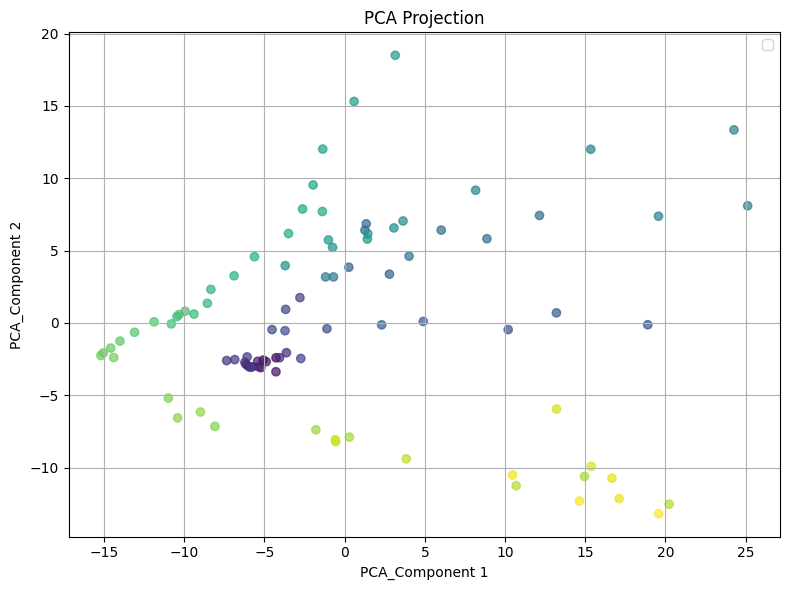

In [98]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_37824\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


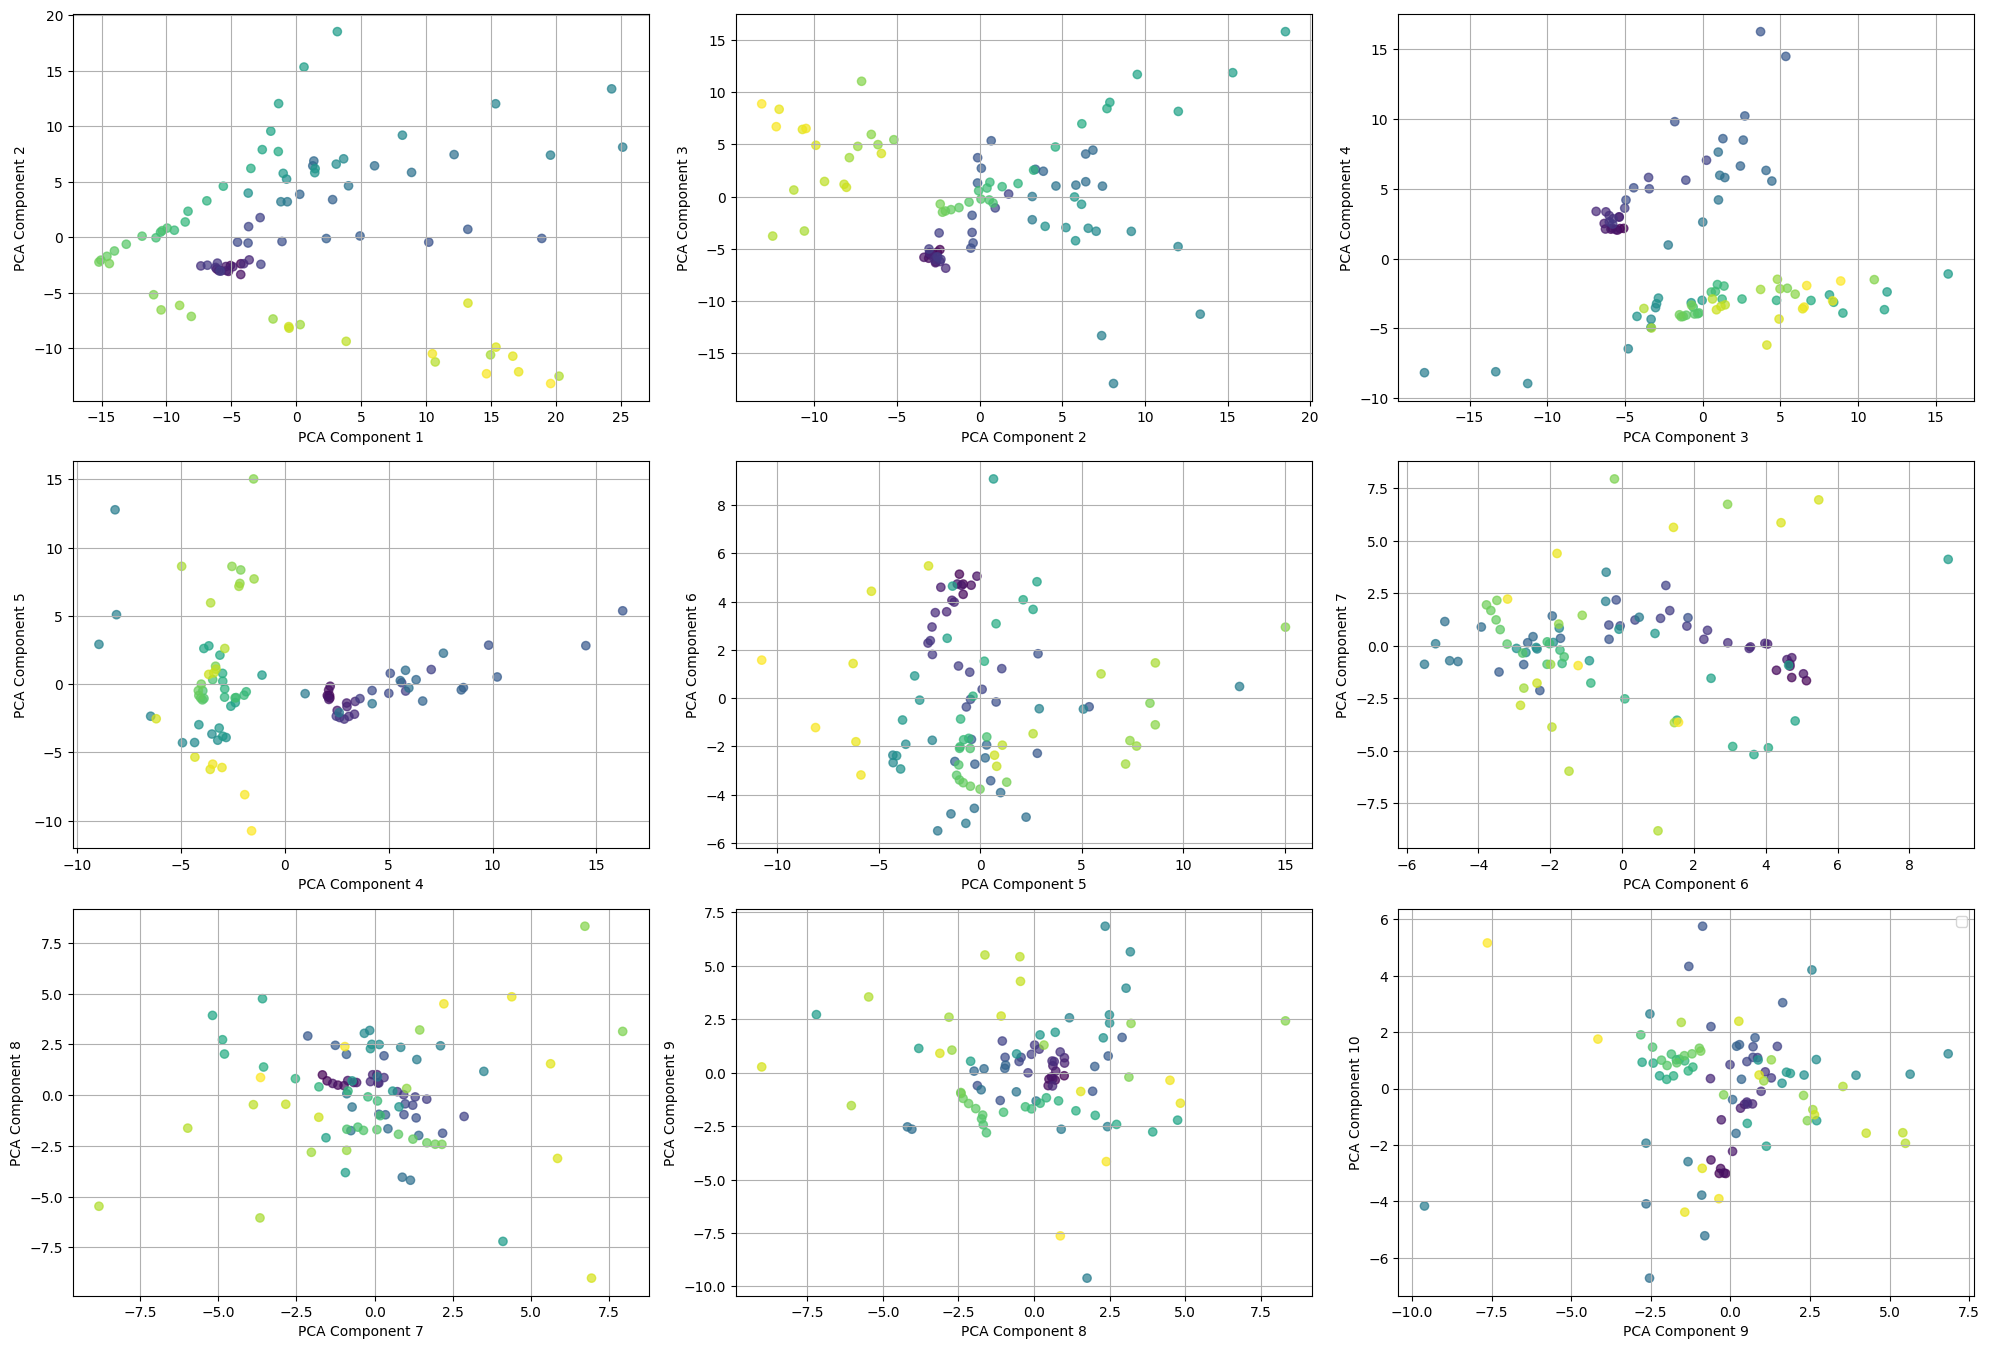

In [99]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [100]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.203
KMeans Davies-Bouldin Index is 1.557


<Axes: xlabel='k'>

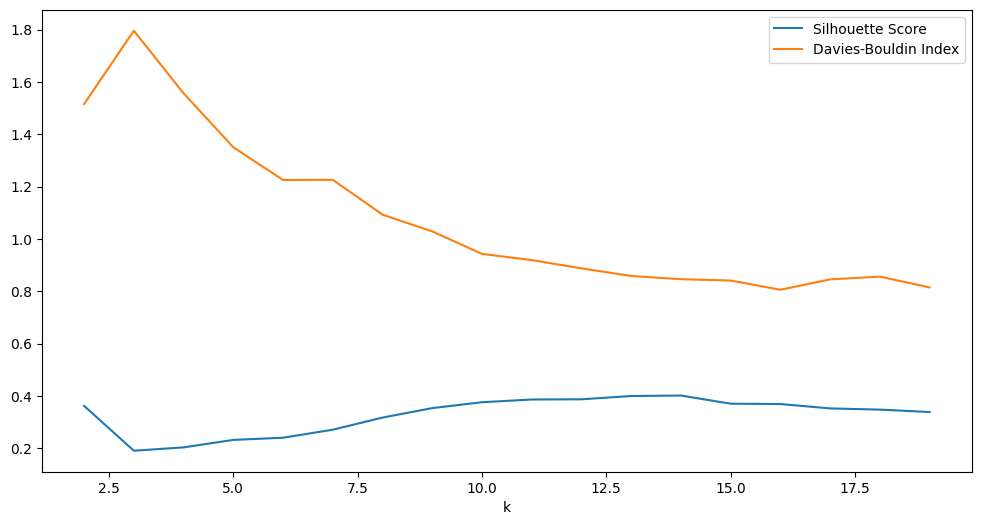

In [101]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         0     92               NaN   
3    1.27            3         1     88               NaN   
4    1.52            3         1     88               NaN   
5    1.78            3         3     81         -0.148823   
6    2.03            3         5     73         -0.096843   
7    2.29            3         3     69         -0.021250   
8    2.54            3         3     66          0.017020   
9    2.80            3         3     63          0.051966   
10   3.05            3         3     61          0.060240   
11   3.31            3         3     61          0.060240   
12   3.56            3         3     61          0.060240   
13   3.82            3         3     59          0.079873   
14   4.07            3         4     56          0.044766   
15   4.33            3         4     52          0.067174   
16   4.58            3         4     50          0.080387   
17   4.84            3         4     50          0.080387   
18   5.09            3         5     42          0.127099   
19   5.35            3         5     37          0.141618   
20   5.60            3         5     37          0.141618   
21   5.86            3         6     30          0.186534   
22   6.11            3         6     29          0.197337   
23   6.37            3         6     29          0.197337   
24   6.62            3         6     28          0.205968   
25   6.88            3         6     28          0.205968   
26   7.13            3         6     27          0.216059   
27   7.39            3         6     27          0.216059   
28   7.64            3         6     27          0.216059   
29   7.90            3         6     26          0.215022   
30   8.15            3         6     26          0.215022   
31   8.41            3         6     25          0.219234   
32   8.66            3         5     25          0.223505   
33   8.92            3         4     25          0.198315   
34   9.17            3         4     25          0.198315   
35   9.43            3         4     22          0.163407   
36   9.68            3         3     21          0.147036   
37   9.94            3         4     17          0.143779   
38  10.19            3         4     17          0.143779   
39  10.45            3         3     17          0.167844   
40  10.70            3         3     17          0.167844   
41  10.96            3         3     16          0.173562   
42  11.21            3         3     15          0.168008   
43  11.47            3         3     15          0.168008   
44  11.72            3         3     15          0.168008   
45  11.98            3         3     13          0.183279   
46  12.23            3         3     12          0.175175   
47  12.49            3         3     12          0.175175   
48  12.74            3         3     10          0.178397   
49  13.00            3         3     10          0.178397   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5               1.258283  
6               1.278743  
7               1.339046  
8               1.331779  
9               1.321370  
10              1.315758  
11              1.315758  
12              1.315758  
13              1.330123  
14              1.388098  
15              1.523792  
16              1.553077  
17              1.553077  
18              1.638495  
19              1.682502  
20              1.682502  
21              1.713369  
22              1.763568  
23              1.763568  
24              1.761328  
25              1.761328  
26              1.757929  
27              1.757929  
28              1.757929  
29              1.735478  
30              1.735478  
31              1.798596  
32 

<Axes: xlabel='eps'>

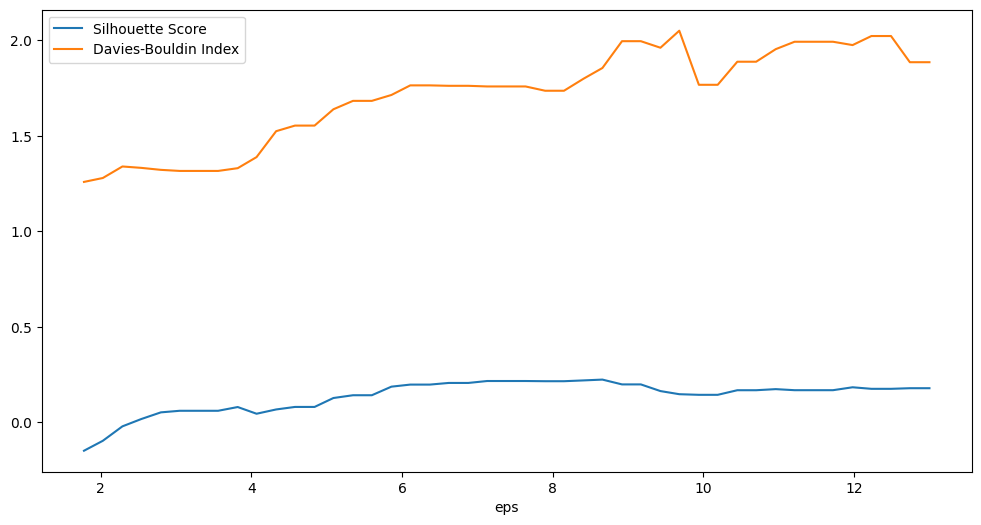

In [102]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

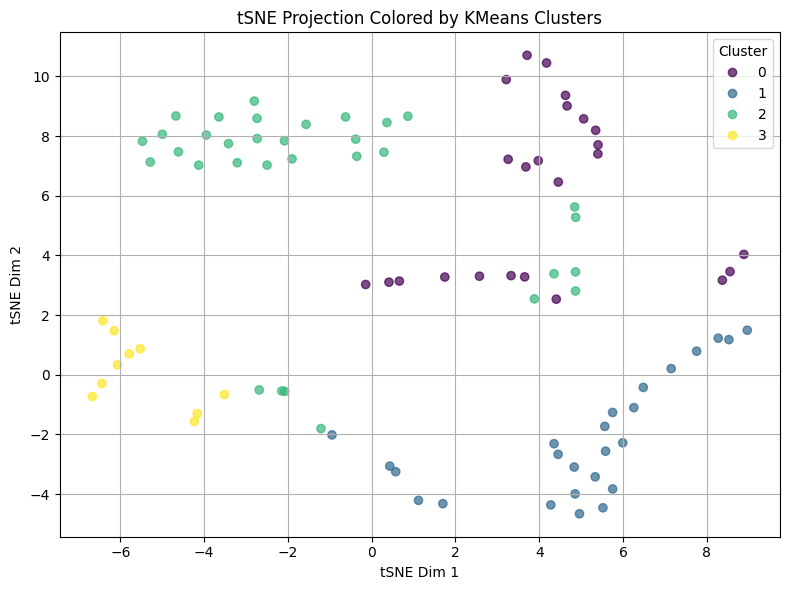

In [103]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  Davies-Bouldin Index
0   0.05            2        12     58         -0.147759              0.957464
1   0.07            2         9     31         -0.082119              0.800598
2   0.09            2         4     23          0.284462              0.476626
3   0.11            2         4     17          0.274678              0.483915
4   0.13            2         4     15          0.273607              0.505448
5   0.15            2         4     11          0.268231              0.530571
6   0.17            2         5      7          0.248016              0.563788
7   0.19            2         4      6          0.395641              0.481615
8   0.21            2         4      5          0.393745              0.482573
9   0.22            2         2      4          0.745616              0.194232
10  0.24            2         2      4          0.745616              0.194232
11  0.26            2         2      4          0.745616              0.194232
12  0.28            2         2      4          0.745616              0.194232
13  0.30            2         2      4          0.745616              0.194232
14  0.32            2         2      4          0.745616              0.194232
15  0.34            2         2      4          0.745616              0.194232
16  0.36            2         2      4          0.745616              0.194232
17  0.38            2         2      3          0.766746              0.263634
18  0.40            2         1      3               NaN                   NaN
19  0.42            2         1      2               NaN                   NaN
20  0.44            2         1      2               NaN                   NaN
21  0.46            2         1      2               NaN                   NaN
22  0.48            2         1      2               NaN                   NaN
23  0.50            2         1      1               NaN                   NaN
24  0.52            2         1      1               NaN                   NaN
25  0.53            2         1      1               NaN                   NaN
26  0.55            2         1      1               NaN                   NaN
27  0.57            2         1      1               NaN                   NaN
28  0.59            2         1      1               NaN                   NaN
29  0.61            2         1      1               NaN                   NaN
30  0.63            2         1      1               NaN                   NaN
31  0.65            2         1      1               NaN                   NaN
32  0.67            2         1      1               NaN                   NaN
33  0.69            2         1      1               NaN                   NaN
34  0.71            2         1      1               NaN                   NaN
35  0.73            2         1      1               NaN                   NaN
36  0.75            2         1      1               NaN                   NaN
37  0.77            2         1      1               NaN                   NaN
38  0.79            2         1      1               NaN                   NaN
39  0.81            2         1      1               NaN                   NaN
40  0.83            2         1      1               NaN                   NaN
41  0.84            2         1      1               NaN                   NaN
42  0.86            2         1      1               NaN                   NaN
43  0.88            2         1      1               NaN                   NaN
44  0.90            2         1      1               NaN                   NaN
45  0.92            2         1      1               NaN                   NaN
46  0.94            2         1      1               NaN                   NaN
47  0.96            2         1      1               NaN                   NaN
48  0.98            2         1      1               NaN                   NaN
49  1.00            2         1      1               Na

<Axes: xlabel='eps'>

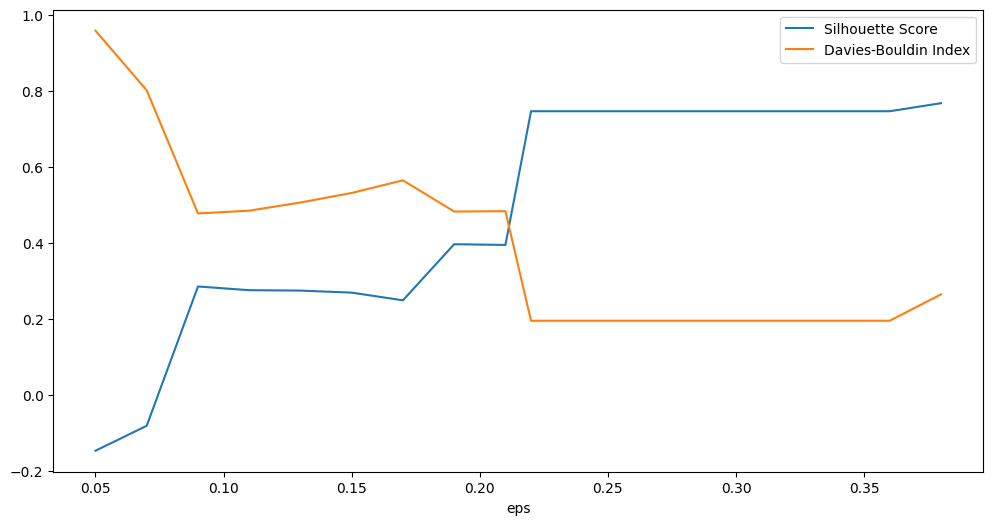

In [104]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 50)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Fall (3)

In [105]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [106]:
#Start with spring and work our way down to winter
season = 3
season_year = 2004
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2004-09-01 to 2004-11-30
Columns: 291 entries, 10000009 to 22000047
dtypes: float64(291)
memory usage: 207.6 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2004-09-01  0.546893  0.519080  0.126275  0.793921  0.377243  0.759243   
2004-09-02  0.554759  0.509714  0.125443  0.603618  0.337399  0.782136   
2004-09-03  0.541039  0.500970  0.127784  0.567258  0.352580  0.773098   
2004-09-04  0.520223  0.494143  0.112908  0.542194  0.336684  0.758810   
2004-09-05  0.496673  0.488169  0.114140  0.548478  0.340890  0.744372   
...              ...       ...       ...       ...       ...       ...   
2004-11-26  1.770393  0.749095  0.719617  1.213625  0.685900  1.517659   
2004-11-27  2.046943  0.855785  0.907792  1.377876  0.781861  1.549762   
2004-11-28  1.952445  0.822949  0.784351  1.307316  0.726585  1.572495   
2004-11-29  1.751654  0.766712  0.712189  1.230123  0.662667  1.585465   
2004-11-30  1.645185  0.722094  0.622534  1.175260  0.633189  1.573069   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2004-09-01  0.973877  0.333507  

          2004-09-01  2004-09-02  2004-09-03  2004-09-04  2004-09-05  \
10000009   -0.078761   -0.074095   -0.066105   -0.061736   -0.060018   
10000010   -0.081098   -0.077953   -0.069544   -0.064004   -0.060760   
10000011   -0.114091   -0.110869   -0.101578   -0.097166   -0.093423   
10000014   -0.058012   -0.069910   -0.063854   -0.059825   -0.055494   
10000016   -0.093011   -0.092713   -0.082282   -0.077701   -0.073621   
...              ...         ...         ...         ...         ...   
7000003    -0.104993   -0.100771   -0.090100   -0.085057   -0.082465   
8000001    -0.089146   -0.085378   -0.078052   -0.073807   -0.070878   
9000001    -0.040259   -0.035972   -0.041006   -0.050426   -0.051109   
9000015    -0.040548   -0.036227   -0.040036   -0.048078   -0.048366   
22000047   -0.051182   -0.063426   -0.060301   -0.056977   -0.054025   

          2004-09-06  2004-09-07  2004-09-08  2004-09-09  2004-09-10  ...  \
10000009   -0.058279   -0.056116   -0.055115   -0.053498  

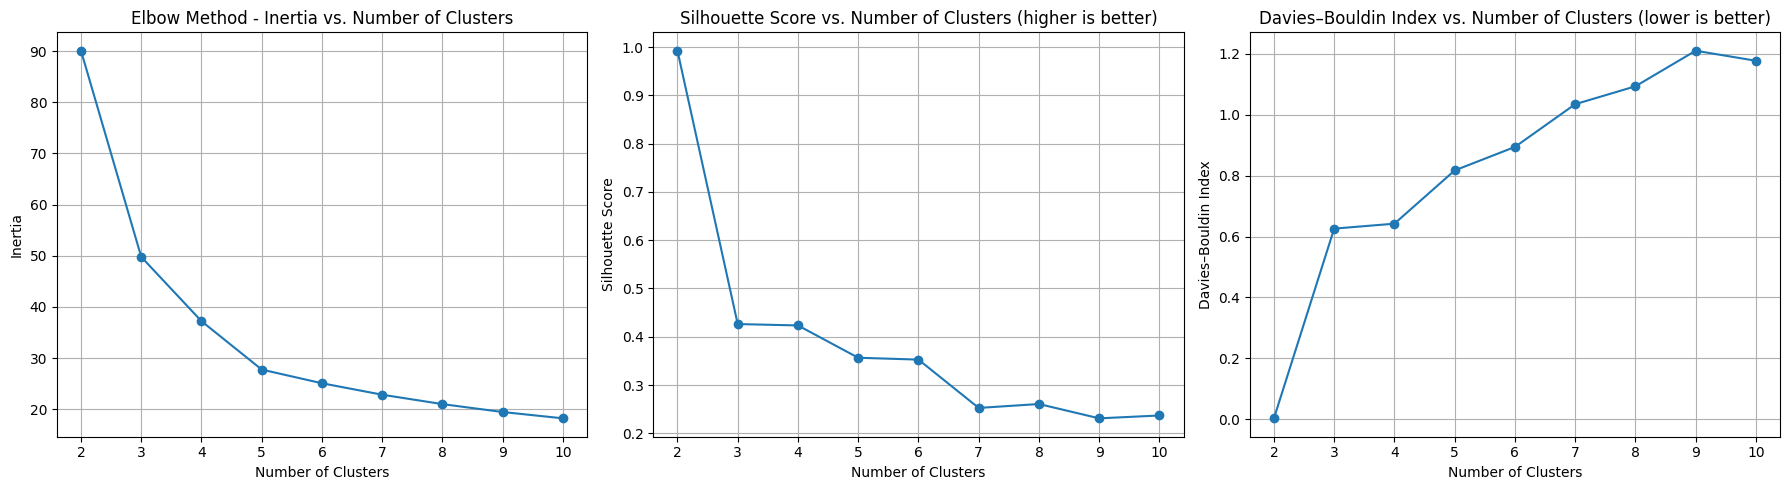

In [107]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        2
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  11000011  \
2004-09-01  0.546893  0.519080  0.126275  0.793921  0.377243  0.759243   
2004-09-02  0.554759  0.509714  0.125443  0.603618  0.337399  0.782136   
2004-09-03  0.541039  0.500970  0.127784  0.567258  0.352580  0.773098   
2004-09-04  0.520223  0.494143  0.112908  0.542194  0.336684  0.758810   
2004-09-05  0.496673  0.488169  0.114140  0.548478  0.340890  0.744372   
...              ...       ...       ...       ...       ...       ...   
2004-11-26  1.770393  0.749095  0.719617  1.213625  0.685900  1.517659   
2004-11-27  2.046943  0.855785  0.907792  1.377876  0.781861  1.549762   
2004-11-28  1.952445  0.822949  0.784351  1.307316  0.726585  1.572495   
2004-11-29  1.751654  0.766712  0.712189  1.230123  0.662667  1.585465   
2004-11-30  1.645185  0.722094  0.622534  1.175260  0.633189  1.573069   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2004-09-01  0.973877  0.333507  

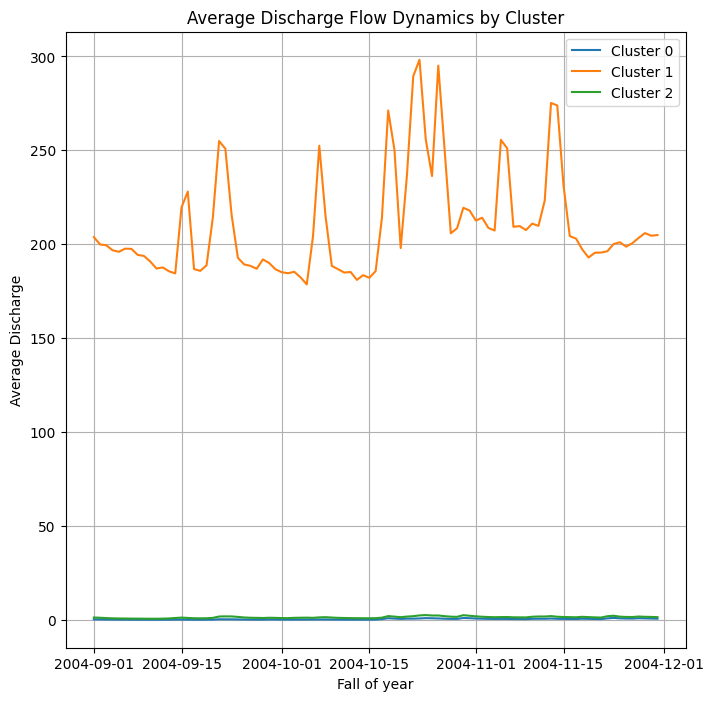

In [108]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Fall of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [109]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [110]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  11000011  \
2004-09-01  0.546893  0.519080  0.126275  0.793921  0.377243  0.759243   
2004-09-02  0.554759  0.509714  0.125443  0.603618  0.337399  0.782136   
2004-09-03  0.541039  0.500970  0.127784  0.567258  0.352580  0.773098   
2004-09-04  0.520223  0.494143  0.112908  0.542194  0.336684  0.758810   
2004-09-05  0.496673  0.488169  0.114140  0.548478  0.340890  0.744372   
...              ...       ...       ...       ...       ...       ...   
2004-11-26  1.770393  0.749095  0.719617  1.213625  0.685900  1.517659   
2004-11-27  2.046943  0.855785  0.907792  1.377876  0.781861  1.549762   
2004-11-28  1.952445  0.822949  0.784351  1.307316  0.726585  1.572495   
2004-11-29  1.751654  0.766712  0.712189  1.230123  0.662667  1.585465   
2004-11-30  1.645185  0.722094  0.622534  1.175260  0.633189  1.573069   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2004-09-01  0.973877  0.333507  0.485055  0.806040  ...  0.014096  0.486942   
2004-09-02  0.872978  0.313782  0.467319  0.776599  ...  0.014096  0.413650   
2004-09-03  0.756697  0.294057  0.449583  0.751151  ...  0.014220  0.254252   
2004-09-04  0.695353  0.278187  0.435312  0.732529  ...  0.013602  0.191052   
2004-09-05  0.661293  0.267758  0.425934  0.722249  ...  0.015456  0.151485   
...              ...       ...       ...       ...  ...       ...       ...   
2004-11-26  1.470584  0.876958  1.532944  1.188864  ...  0.070728  1.199698   
2004-11-27  1.974841  1.054178  1.933200  1.323262  ...  0.066401  2.050664   
2004-11-28  1.946254  0.970367  1.695216  1.296664  ...  0.057003  2.082867   
2004-11-29  1.800599  0.877713  1.537038  1.241463  ...  0.047606  1.738074   
2004-11-30  1.591856  0.798059  1.427294  1.188564  ...  0.037714  1.455713   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2004-09-01  0.055067  1.273285  0.083941  0.234590  0.423263  1.005278   
2004-09-02  0.181325  0.932723  0.276402  0.243324  0.423032  0.999828   
2004-09-03  0.186794  0.577210  0.284740  0.261497  0.401853  0.833434   
2004-09-04  0.157786  0.415223  0.240522  0.252124  0.381454  0.650239   
2004-09-05  0.133865  0.291396  0.204058  0.239625  0.372309  0.598683   
...              ...       ...       ...       ...       ...       ...   
2004-11-26  1.593806  1.860075  2.552671  1.589170  1.482302  1.778944   
2004-11-27  1.895390  3.022512  2.897657  2.048836  1.832319  1.953431   
2004-11-28  1.995780  2.552241  2.813697  1.823063  1.615019  1.943238   
2004-11-29  1.690312  2.014085  2.638613  1.636208  1.437892  1.802275   
2004-11-30  1.436088  1.516654  2.456422  1.482795  1.340220  1.667216   

             9000015  22000047  
2004-09-01  1.001835  0.875241  
2004-09-02  0.996851  0.679315  
2004-09-03  0.844726  0.608654  
2004-09-04  0.677239  0.574929  
2004-09-05  0.630103  0.565293  
...              ...       ...  
2004-11-26  1.709162  0.592594  
2004-11-27  1.868687  0.607048  
2004-11-28  1.859368  0.574929  
2004-11-29  1.730491  0.568505  
2004-11-30  1.607014  0.576535  

[91 rows x 291 columns]

<Axes: >

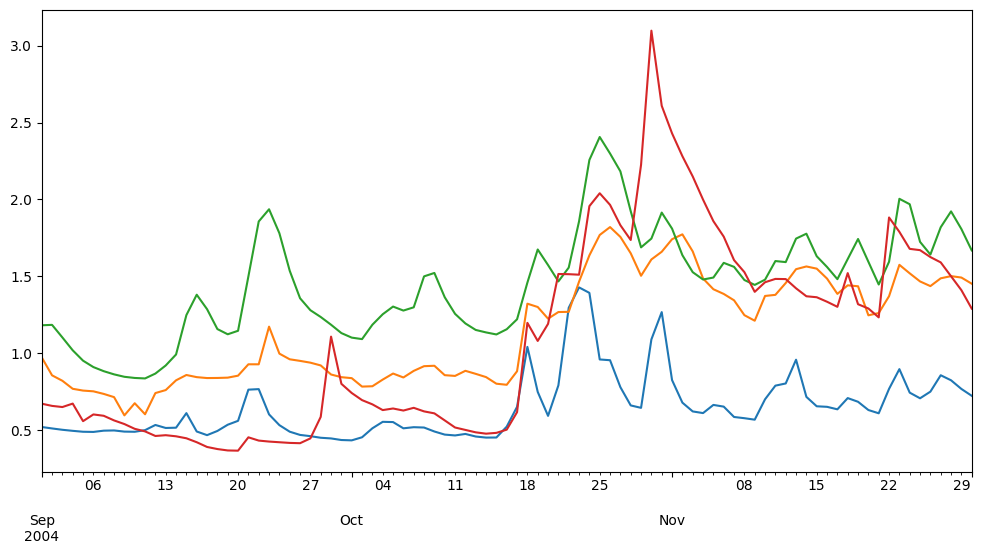

In [111]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

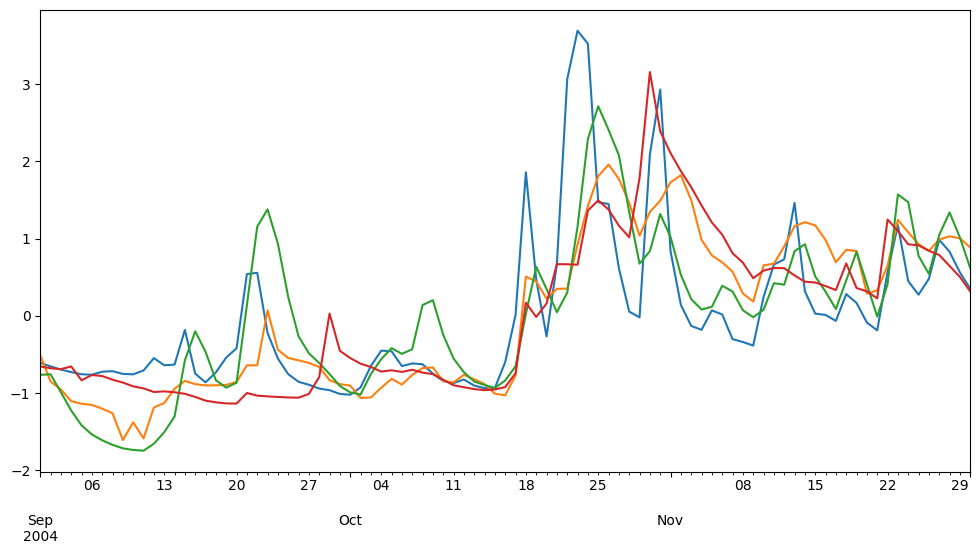

In [112]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

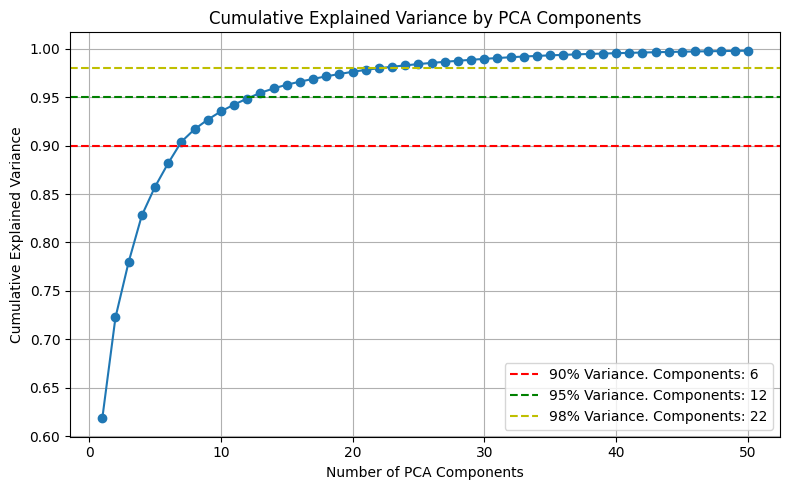

In [113]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [114]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ -6.89777786,   0.13295914,   8.44171452, ...,  -0.93787854,
         -1.61712005,   0.47189129],
       [ -8.17760485,   1.48881559,   5.24971849, ...,  -1.09835519,
          0.49842699,  -0.32190857],
       [-11.73111709,   2.65104397,   1.99675484, ...,   0.06866619,
          0.88179004,  -0.60280809],
       ...,
       [ 17.31031871,  13.80947163,   2.72630457, ...,   0.20141427,
         -0.55043538,   0.02446045],
       [ 13.82172748,  12.10537811,   1.42573218, ...,   1.16930225,
          0.06306183,   1.15055447],
       [  9.99158837,  11.12526185,   0.15016975, ...,   1.37767211,
          0.42569244,   1.89929896]], shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_37824\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


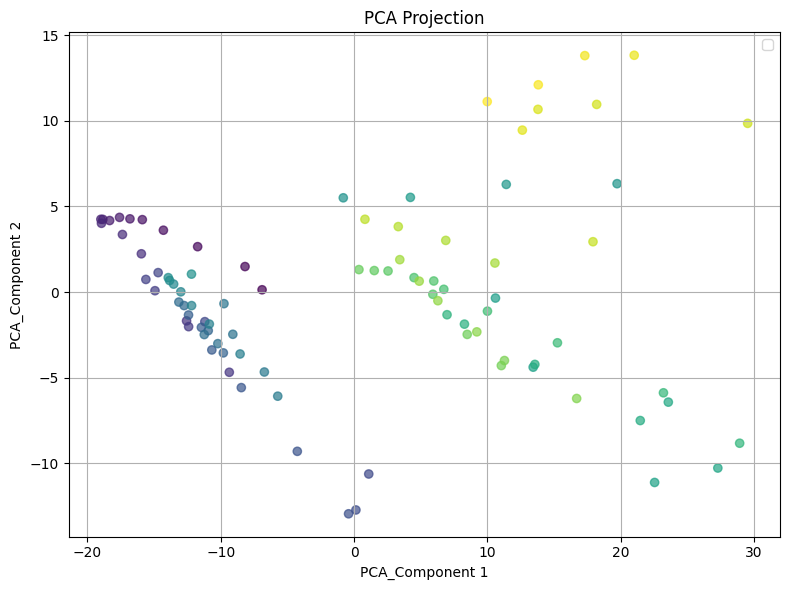

In [115]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_37824\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


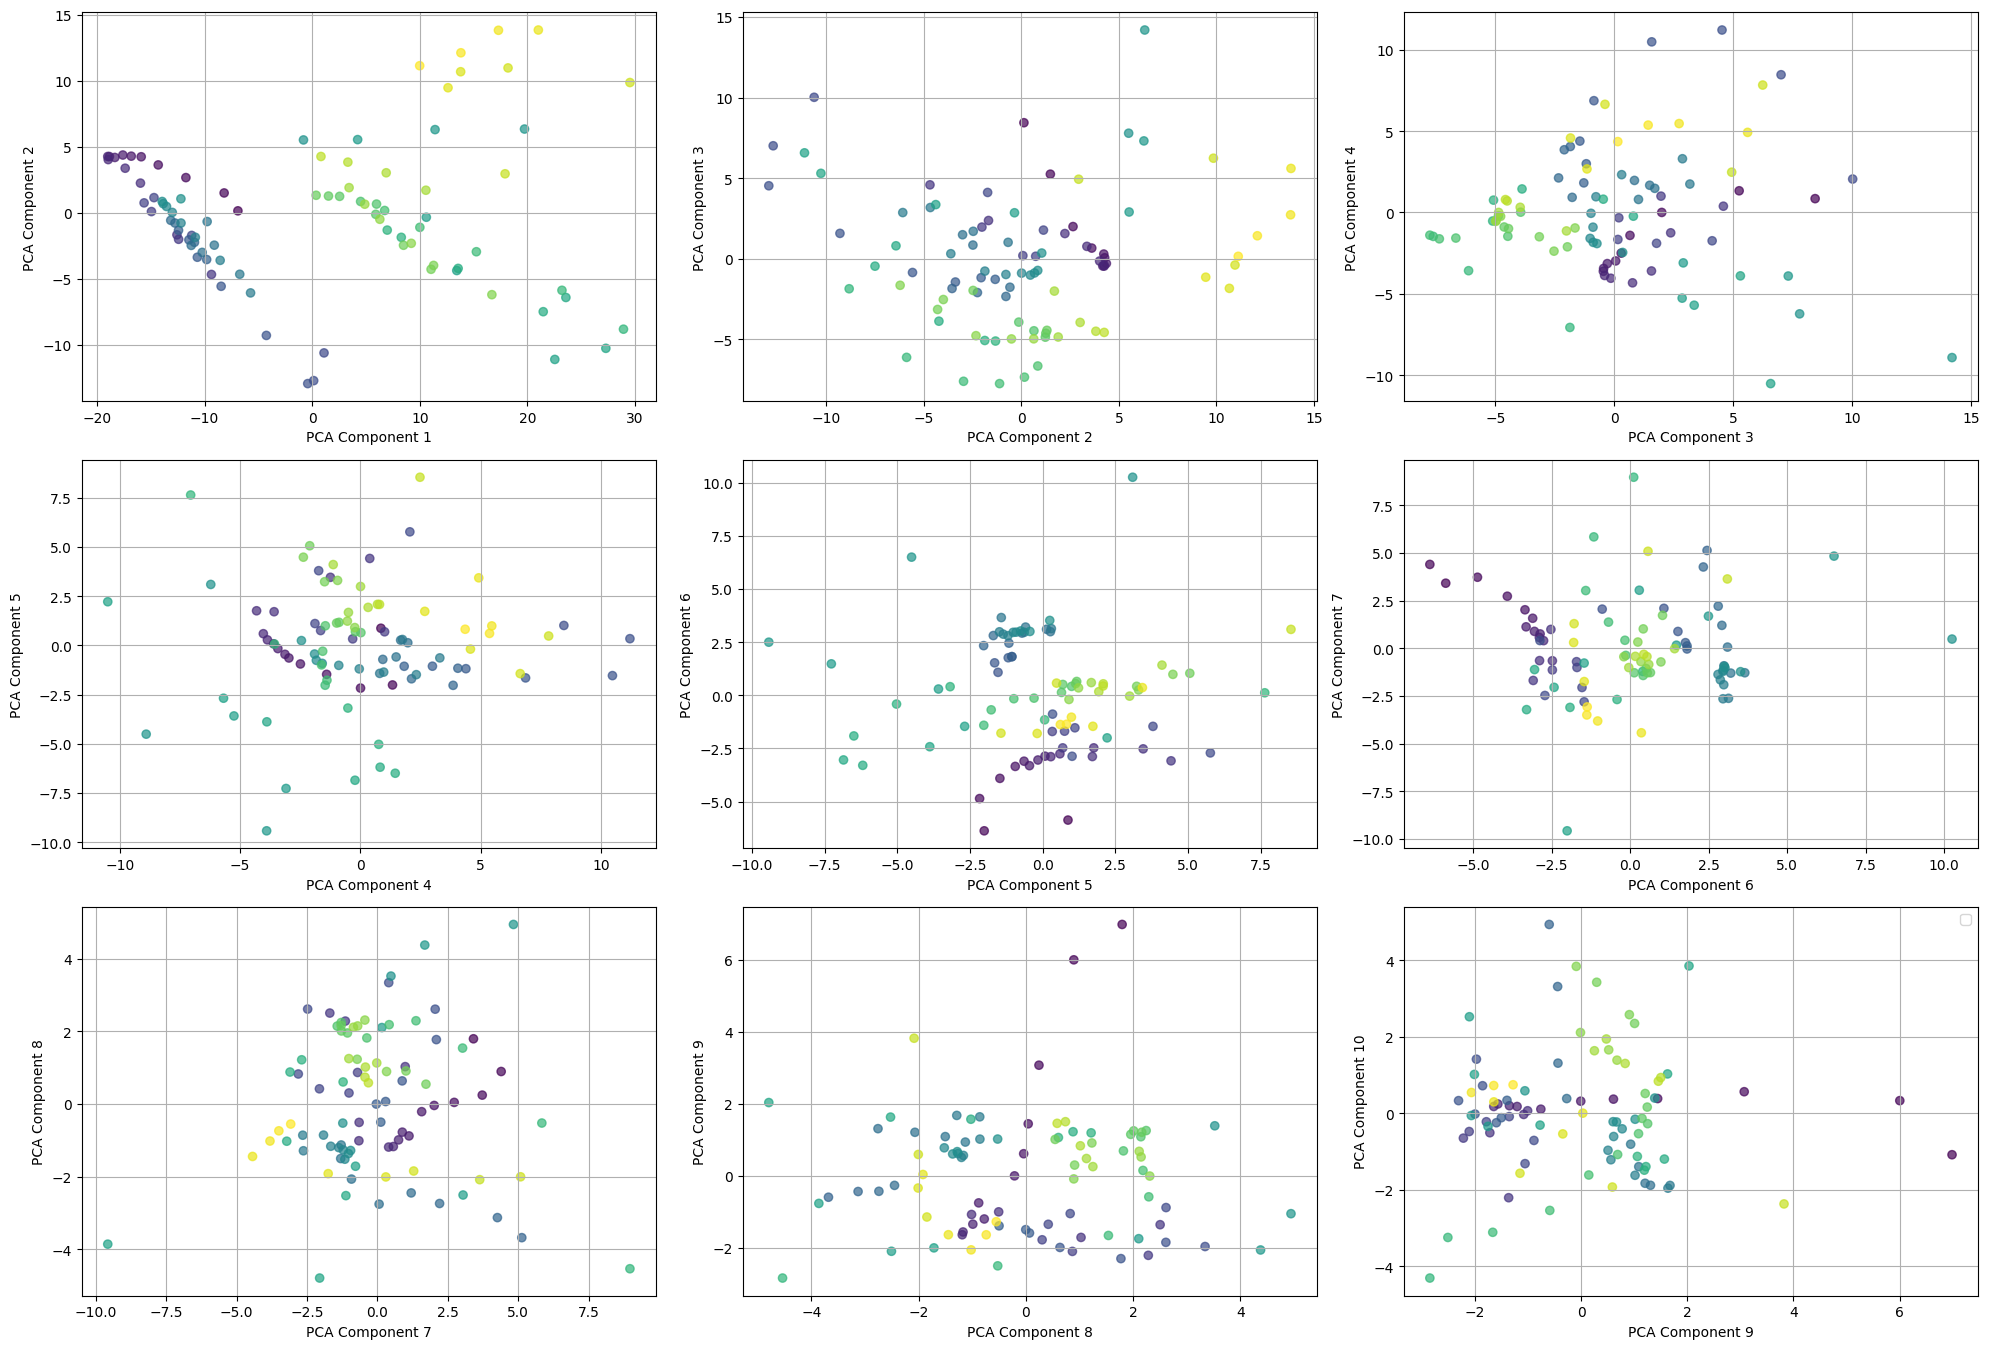

In [116]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [117]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.275
KMeans Davies-Bouldin Index is 1.435


<Axes: xlabel='k'>

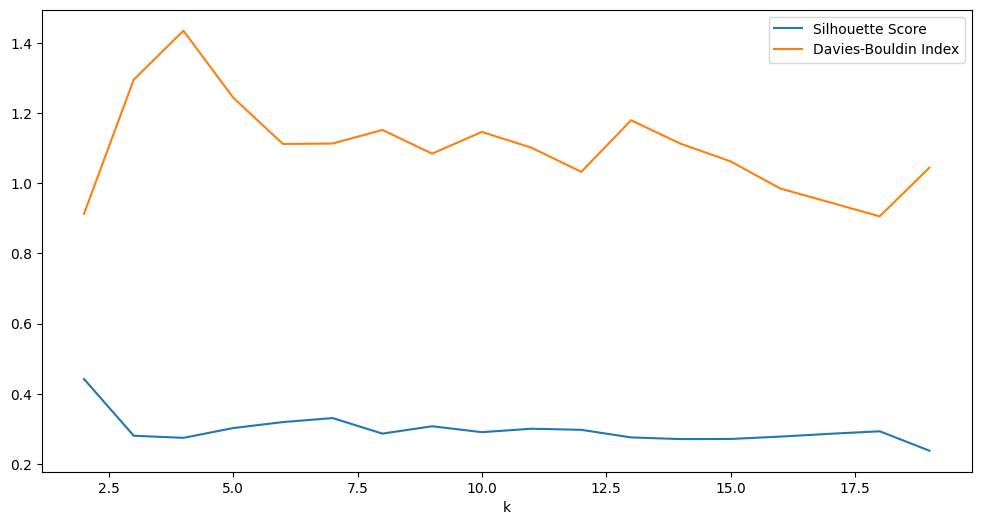

In [118]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     91               NaN   
1    0.76            3         2     85         -0.090046   
2    1.01            3         2     84         -0.069796   
3    1.27            3         2     82         -0.038847   
4    1.52            3         2     82         -0.038847   
5    1.78            3         2     81         -0.030588   
6    2.03            3         2     79         -0.001014   
7    2.29            3         3     75         -0.206620   
8    2.54            3         6     66         -0.122756   
9    2.80            3         6     64         -0.101193   
10   3.05            3         6     61         -0.073137   
11   3.31            3         5     61         -0.091946   
12   3.56            3         5     61         -0.091946   
13   3.82            3         5     56         -0.052893   
14   4.07            3         5     53         -0.064558   
15   4.33            3         6     46         -0.020180   
16   4.58            3         4     41          0.122898   
17   4.84            3         4     38          0.149556   
18   5.09            3         4     38          0.149556   
19   5.35            3         4     36          0.167611   
20   5.60            3         5     33          0.134322   
21   5.86            3         6     28          0.163427   
22   6.11            3         6     27          0.164651   
23   6.37            3         7     22          0.180510   
24   6.62            3         4     22          0.329446   
25   6.88            3         4     19          0.347651   
26   7.13            3         4     19          0.347651   
27   7.39            3         3     19          0.376215   
28   7.64            3         4     16          0.386665   
29   7.90            3         3     15          0.381381   
30   8.15            3         3     15          0.381381   
31   8.41            3         3     15          0.381381   
32   8.66            3         3     15          0.381381   
33   8.92            3         3     15          0.381381   
34   9.17            3         3     15          0.381381   
35   9.43            3         3     15          0.381381   
36   9.68            3         3     15          0.381381   
37   9.94            3         3     15          0.381381   
38  10.19            3         3     13          0.380980   
39  10.45            3         3     11          0.385232   
40  10.70            3         3     10          0.384106   
41  10.96            3         2     10          0.375127   
42  11.21            3         2     10          0.375127   
43  11.47            3         2     10          0.375127   
44  11.72            3         2     10          0.375127   
45  11.98            3         3      6          0.332275   
46  12.23            3         3      6          0.332275   
47  12.49            3         3      6          0.332275   
48  12.74            3         3      6          0.332275   
49  13.00            3         3      6          0.332275   

    Davies-Bouldin Index  
0                    NaN  
1               0.938927  
2               0.928438  
3               0.932212  
4               0.932212  
5               0.956109  
6               0.947365  
7               1.790836  
8               1.352394  
9               1.306537  
10              1.222435  
11              1.278032  
12              1.278032  
13              1.440543  
14              1.797984  
15              1.825721  
16              1.600907  
17              1.561057  
18              1.561057  
19              1.521724  
20              1.662880  
21              1.639104  
22              1.646401  
23              1.449172  
24              1.562434  
25              1.464452  
26              1.464452  
27              1.556949  
28              1.247139  
29              1.401768  
30              1.401768  
31              1.401768  
32 

<Axes: xlabel='eps'>

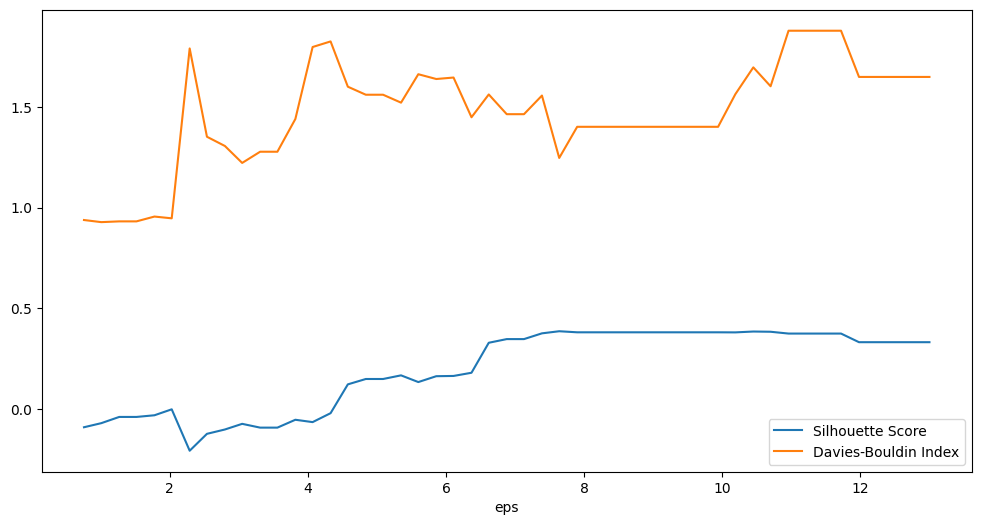

In [119]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

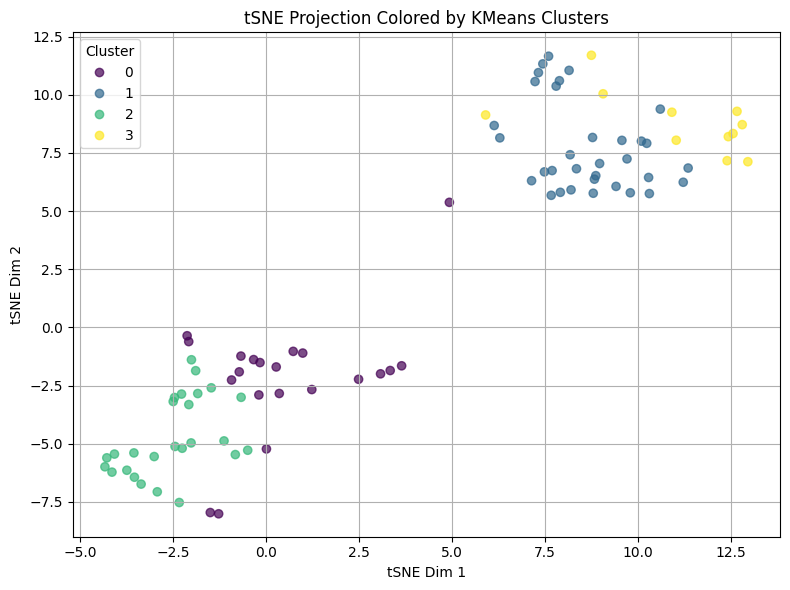

In [120]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2        31    169          0.448937   
1    0.05            2        34    154          0.325259   
2    0.06            2        32    137          0.300779   
3    0.06            2        30    133          0.274853   
4    0.07            2        26    125          0.232601   
..    ...          ...       ...    ...               ...   
195  0.98            2         2      1          0.783358   
196  0.99            2         2      1          0.783358   
197  0.99            2         2      1          0.783358   
198  1.00            2         2      1          0.783358   
199  1.00            2         2      1          0.783358   

     Davies-Bouldin Index  
0                0.513143  
1                0.597479  
2                0.629394  
3                0.656587  
4                0.637176  
..                    ...  
195              0.250811  
196              0.250811  
197              0.250811  
198              0.250811  
199              0.250811  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

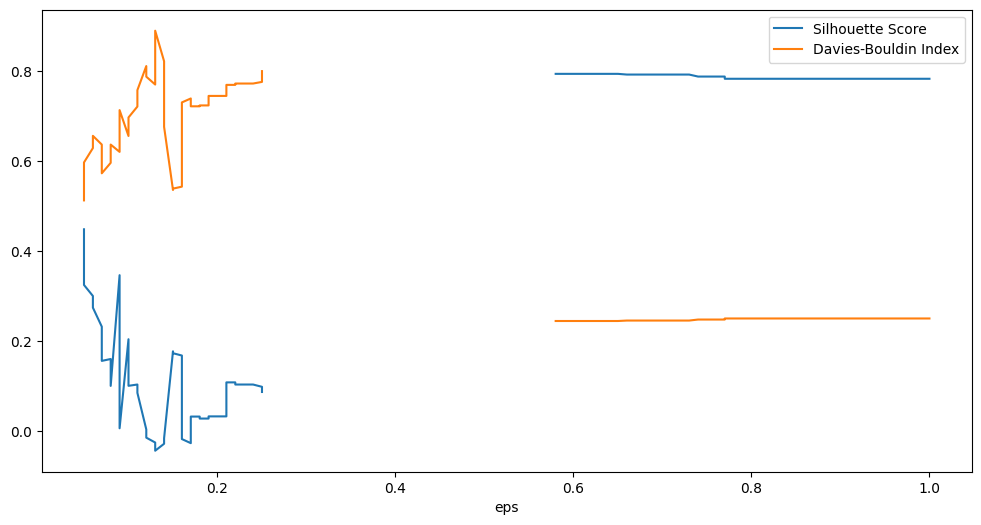

In [121]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Winter (4)

In [122]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [123]:
season = 4
season_year = 2004
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2004-12-01 to 2005-02-28
Columns: 292 entries, 10000009 to 22000047
dtypes: float64(292)
memory usage: 206.0 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2004-12-01  1.581510  0.697916  0.567620  1.159272  0.610292  1.551040   
2004-12-02  1.566876  0.713428  0.570885  1.185464  0.635144  1.524992   
2004-12-03  1.549292  0.707912  0.550866  1.150748  0.611595  1.485002   
2004-12-04  1.524402  0.716129  0.599435  1.149176  0.629741  1.441119   
2004-12-05  1.546477  0.705106  0.620810  1.144690  0.615990  1.386248   
...              ...       ...       ...       ...       ...       ...   
2005-02-24  0.926352  0.755025  0.769906  0.896662  0.644311  1.456767   
2005-02-25  0.908927  0.717390  0.792512  0.879576  0.637478  1.442615   
2005-02-26  0.869132  0.708378  0.670088  0.874757  0.621751  1.437880   
2005-02-27  0.827893  0.684416  0.632298  0.853042  0.597718  1.427100   
2005-02-28  0.790935  0.670518  0.723770  0.836591  0.594943  1.370389   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2004-12-01  1.432224  0.756644  

          2004-12-01  2004-12-02  2004-12-03  2004-12-04  2004-12-05  \
10000009   -0.011763   -0.018836   -0.017149   -0.018383   -0.016173   
10000010   -0.086081   -0.090495   -0.088033   -0.086425   -0.087700   
10000011   -0.097040   -0.102463   -0.101264   -0.096248   -0.094867   
10000014   -0.047277   -0.050861   -0.050725   -0.049970   -0.050330   
10000016   -0.093451   -0.097068   -0.096148   -0.093697   -0.095276   
...              ...         ...         ...         ...         ...   
7000003    -0.029545   -0.038218   -0.039143   -0.033119   -0.026316   
8000001    -0.040859   -0.052466   -0.055705   -0.054242   -0.050871   
9000001    -0.008894   -0.016669   -0.017841   -0.019992   -0.023796   
9000015    -0.013586   -0.021187   -0.022002   -0.023891   -0.027381   
22000047   -0.097236   -0.103607   -0.100995   -0.100068   -0.100951   

          2004-12-06  2004-12-07  2004-12-08  2004-12-09  2004-12-10  ...  \
10000009   -0.018244   -0.018343   -0.017457   -0.017124  

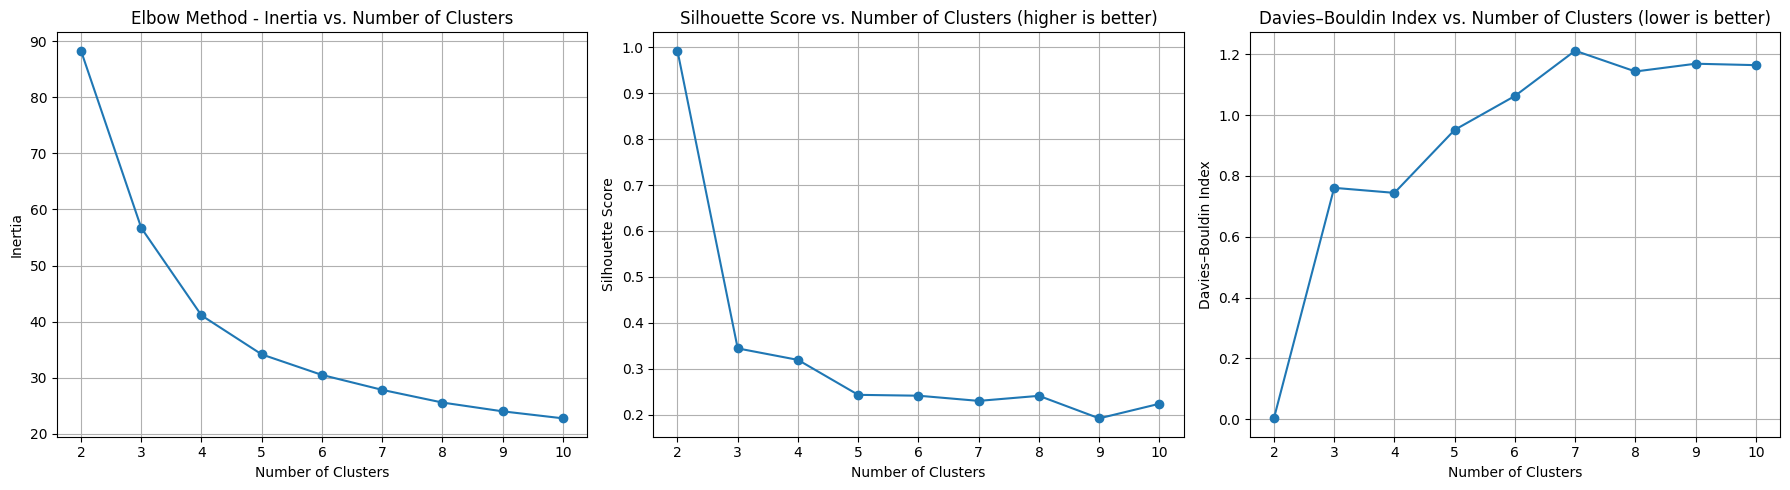

In [124]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        2
10000010        2
10000011        2
10000014        2
10000016        2

            10000009  10000010  10000011  10000014  10000016  11000011  \
2004-12-01  1.581510  0.697916  0.567620  1.159272  0.610292  1.551040   
2004-12-02  1.566876  0.713428  0.570885  1.185464  0.635144  1.524992   
2004-12-03  1.549292  0.707912  0.550866  1.150748  0.611595  1.485002   
2004-12-04  1.524402  0.716129  0.599435  1.149176  0.629741  1.441119   
2004-12-05  1.546477  0.705106  0.620810  1.144690  0.615990  1.386248   
...              ...       ...       ...       ...       ...       ...   
2005-02-24  0.926352  0.755025  0.769906  0.896662  0.644311  1.456767   
2005-02-25  0.908927  0.717390  0.792512  0.879576  0.637478  1.442615   
2005-02-26  0.869132  0.708378  0.670088  0.874757  0.621751  1.437880   
2005-02-27  0.827893  0.684416  0.632298  0.853042  0.597718  1.427100   
2005-02-28  0.790935  0.670518  0.723770  0.836591  0.594943  1.370389   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2004-12-01  1.432224  0.756644  

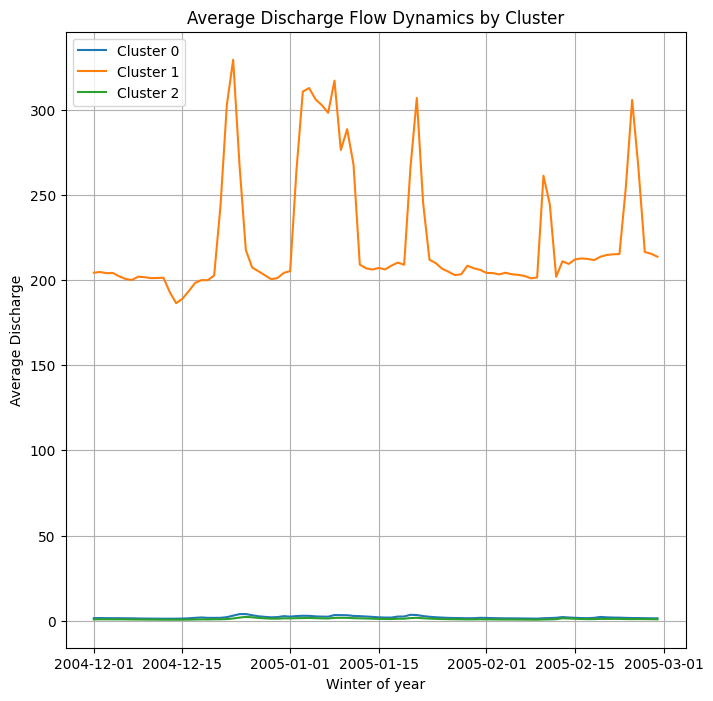

In [125]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Winter of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [126]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [127]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  11000011  \
2004-12-01  1.581510  0.697916  0.567620  1.159272  0.610292  1.551040   
2004-12-02  1.566876  0.713428  0.570885  1.185464  0.635144  1.524992   
2004-12-03  1.549292  0.707912  0.550866  1.150748  0.611595  1.485002   
2004-12-04  1.524402  0.716129  0.599435  1.149176  0.629741  1.441119   
2004-12-05  1.546477  0.705106  0.620810  1.144690  0.615990  1.386248   
...              ...       ...       ...       ...       ...       ...   
2005-02-24  0.926352  0.755025  0.769906  0.896662  0.644311  1.456767   
2005-02-25  0.908927  0.717390  0.792512  0.879576  0.637478  1.442615   
2005-02-26  0.869132  0.708378  0.670088  0.874757  0.621751  1.437880   
2005-02-27  0.827893  0.684416  0.632298  0.853042  0.597718  1.427100   
2005-02-28  0.790935  0.670518  0.723770  0.836591  0.594943  1.370389   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2004-12-01  1.432224  0.756644  1.389420  1.156727  ...  0.030789  1.270255   
2004-12-02  1.317546  0.760725  1.382955  1.161749  ...  0.030665  1.199782   
2004-12-03  1.218456  0.724072  1.355929  1.168389  ...  0.034004  1.081087   
2004-12-04  1.186159  0.731100  1.320418  1.169438  ...  0.037961  0.989063   
2004-12-05  1.188940  0.718177  1.308789  1.185675  ...  0.048719  0.970074   
...              ...       ...       ...       ...  ...       ...       ...   
2005-02-24  1.201823  1.023268  0.887303  1.055137  ...  0.882993  1.878364   
2005-02-25  1.150881  1.066496  0.872761  1.013237  ...  0.857768  2.095001   
2005-02-26  1.139112  1.040726  0.865412  0.991160  ...  0.840086  1.918135   
2005-02-27  1.075994  1.004904  0.823131  0.965723  ...  0.793840  1.591949   
2005-02-28  1.046140  1.009438  0.784217  0.933087  ...  0.785308  1.375386   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2004-12-01  1.282603  1.239494  2.275712  1.370091  1.235576  1.615620   
2004-12-02  1.316621  1.315666  2.389909  1.336042  1.166341  1.592684   
2004-12-03  1.484991  1.227539  2.334872  1.288225  1.091634  1.541073   
2004-12-04  1.407887  1.064138  2.142113  1.349355  1.098432  1.505289   
2004-12-05  1.322348  1.036287  2.050530  1.427164  1.138324  1.456800   
...              ...       ...       ...       ...       ...       ...   
2005-02-24  2.272294  1.730949  2.670719  0.778187  0.984765  1.686114   
2005-02-25  2.252286  2.235621  2.496175  0.749696  0.998270  1.695381   
2005-02-26  1.743546  1.796433  2.148679  0.733298  0.932541  1.686749   
2005-02-27  1.159477  2.526988  2.358360  0.676946  0.869452  1.623357   
2005-02-28  1.032082  3.903642  1.863778  0.636602  0.810773  1.605137   

             9000015  22000047  
2004-12-01  1.559842  0.565293  
2004-12-02  1.538873  0.557264  
2004-12-03  1.491687  0.554052  
2004-12-04  1.458971  0.554052  
2004-12-05  1.414640  0.549234  
...              ...       ...  
2005-02-24  1.624291  0.526751  
2005-02-25  1.632763  0.528357  
2005-02-26  1.624872  0.521933  
2005-02-27  1.566915  0.501055  
2005-02-28  1.550258  0.501055  

[90 rows x 292 columns]

<Axes: >

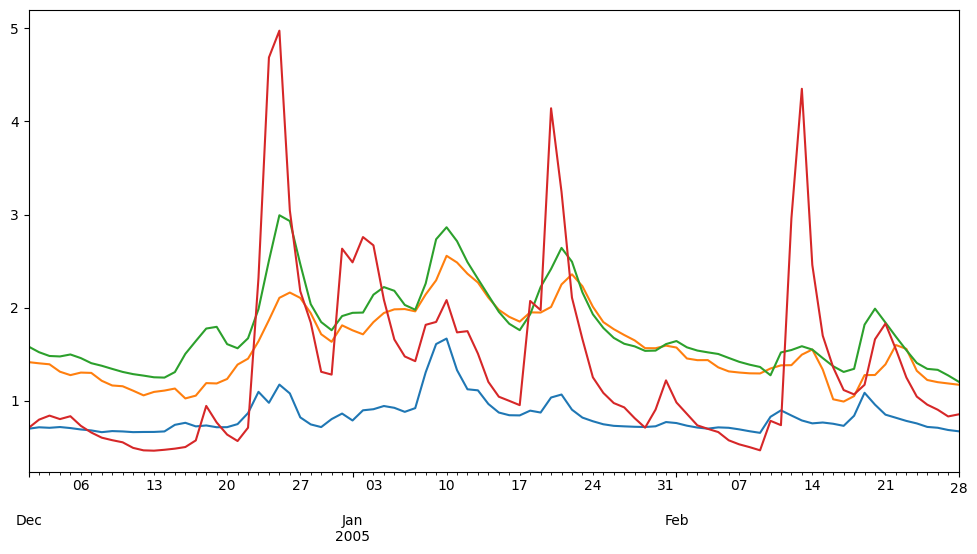

In [128]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

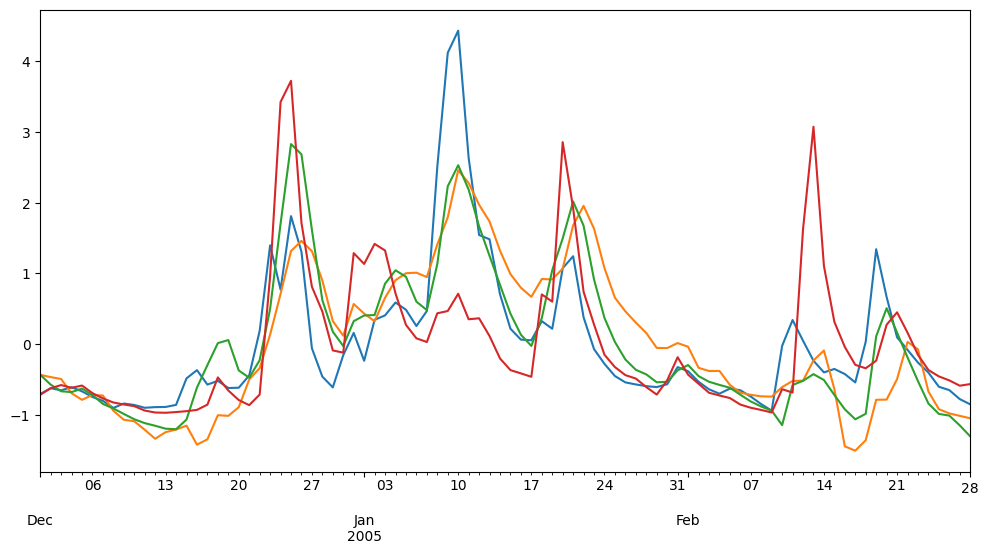

In [129]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

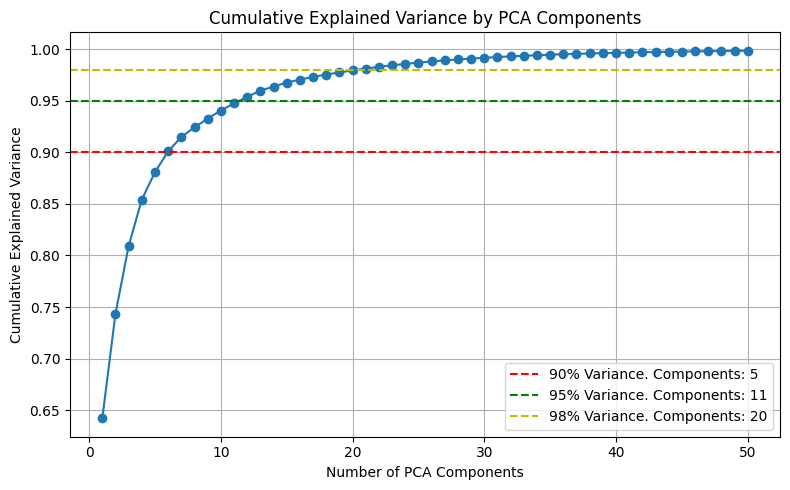

In [130]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [131]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-1.01077215e+01, -2.18128216e+00, -3.46068007e+00, ...,
         1.14542275e+00,  3.59340542e-01,  6.33456672e-01],
       [-8.20155493e+00, -1.73531747e-01, -4.10382698e+00, ...,
         8.59274794e-01,  1.98844547e-01,  4.93391905e-01],
       [-9.08305338e+00,  2.65025334e-01, -3.61803054e+00, ...,
        -3.17313152e-01,  5.36794391e-03,  6.06833569e-01],
       ...,
       [-7.60754759e+00,  6.36632380e+00,  2.88157952e-01, ...,
        -5.82143830e-03, -3.90576050e-01,  8.24271518e-02],
       [-9.61819146e+00,  5.44810573e+00,  5.23387416e-01, ...,
        -3.89098520e-01, -9.89595368e-01, -4.57638431e-02],
       [-1.09979089e+01,  4.04611464e+00,  3.49360425e-01, ...,
        -1.87136037e-01, -1.19470746e+00, -6.80805933e-01]],
      shape=(90, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_37824\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


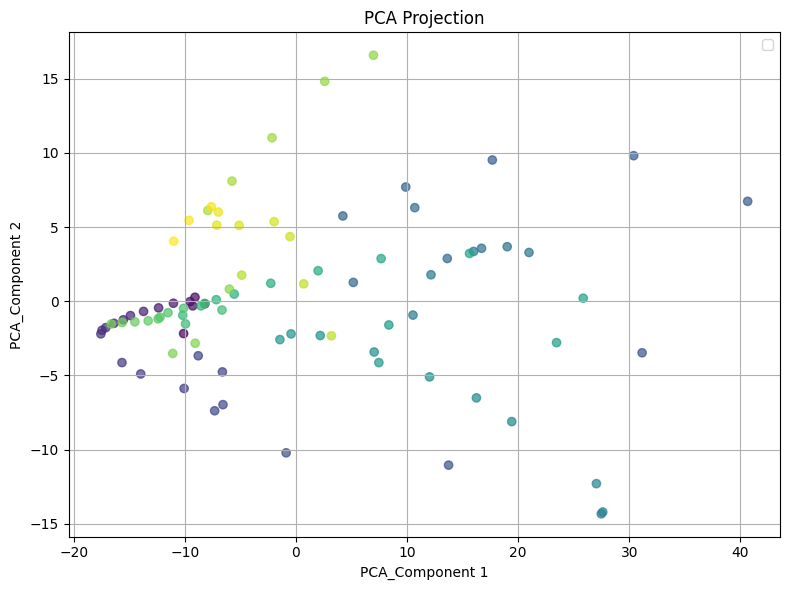

In [132]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_37824\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


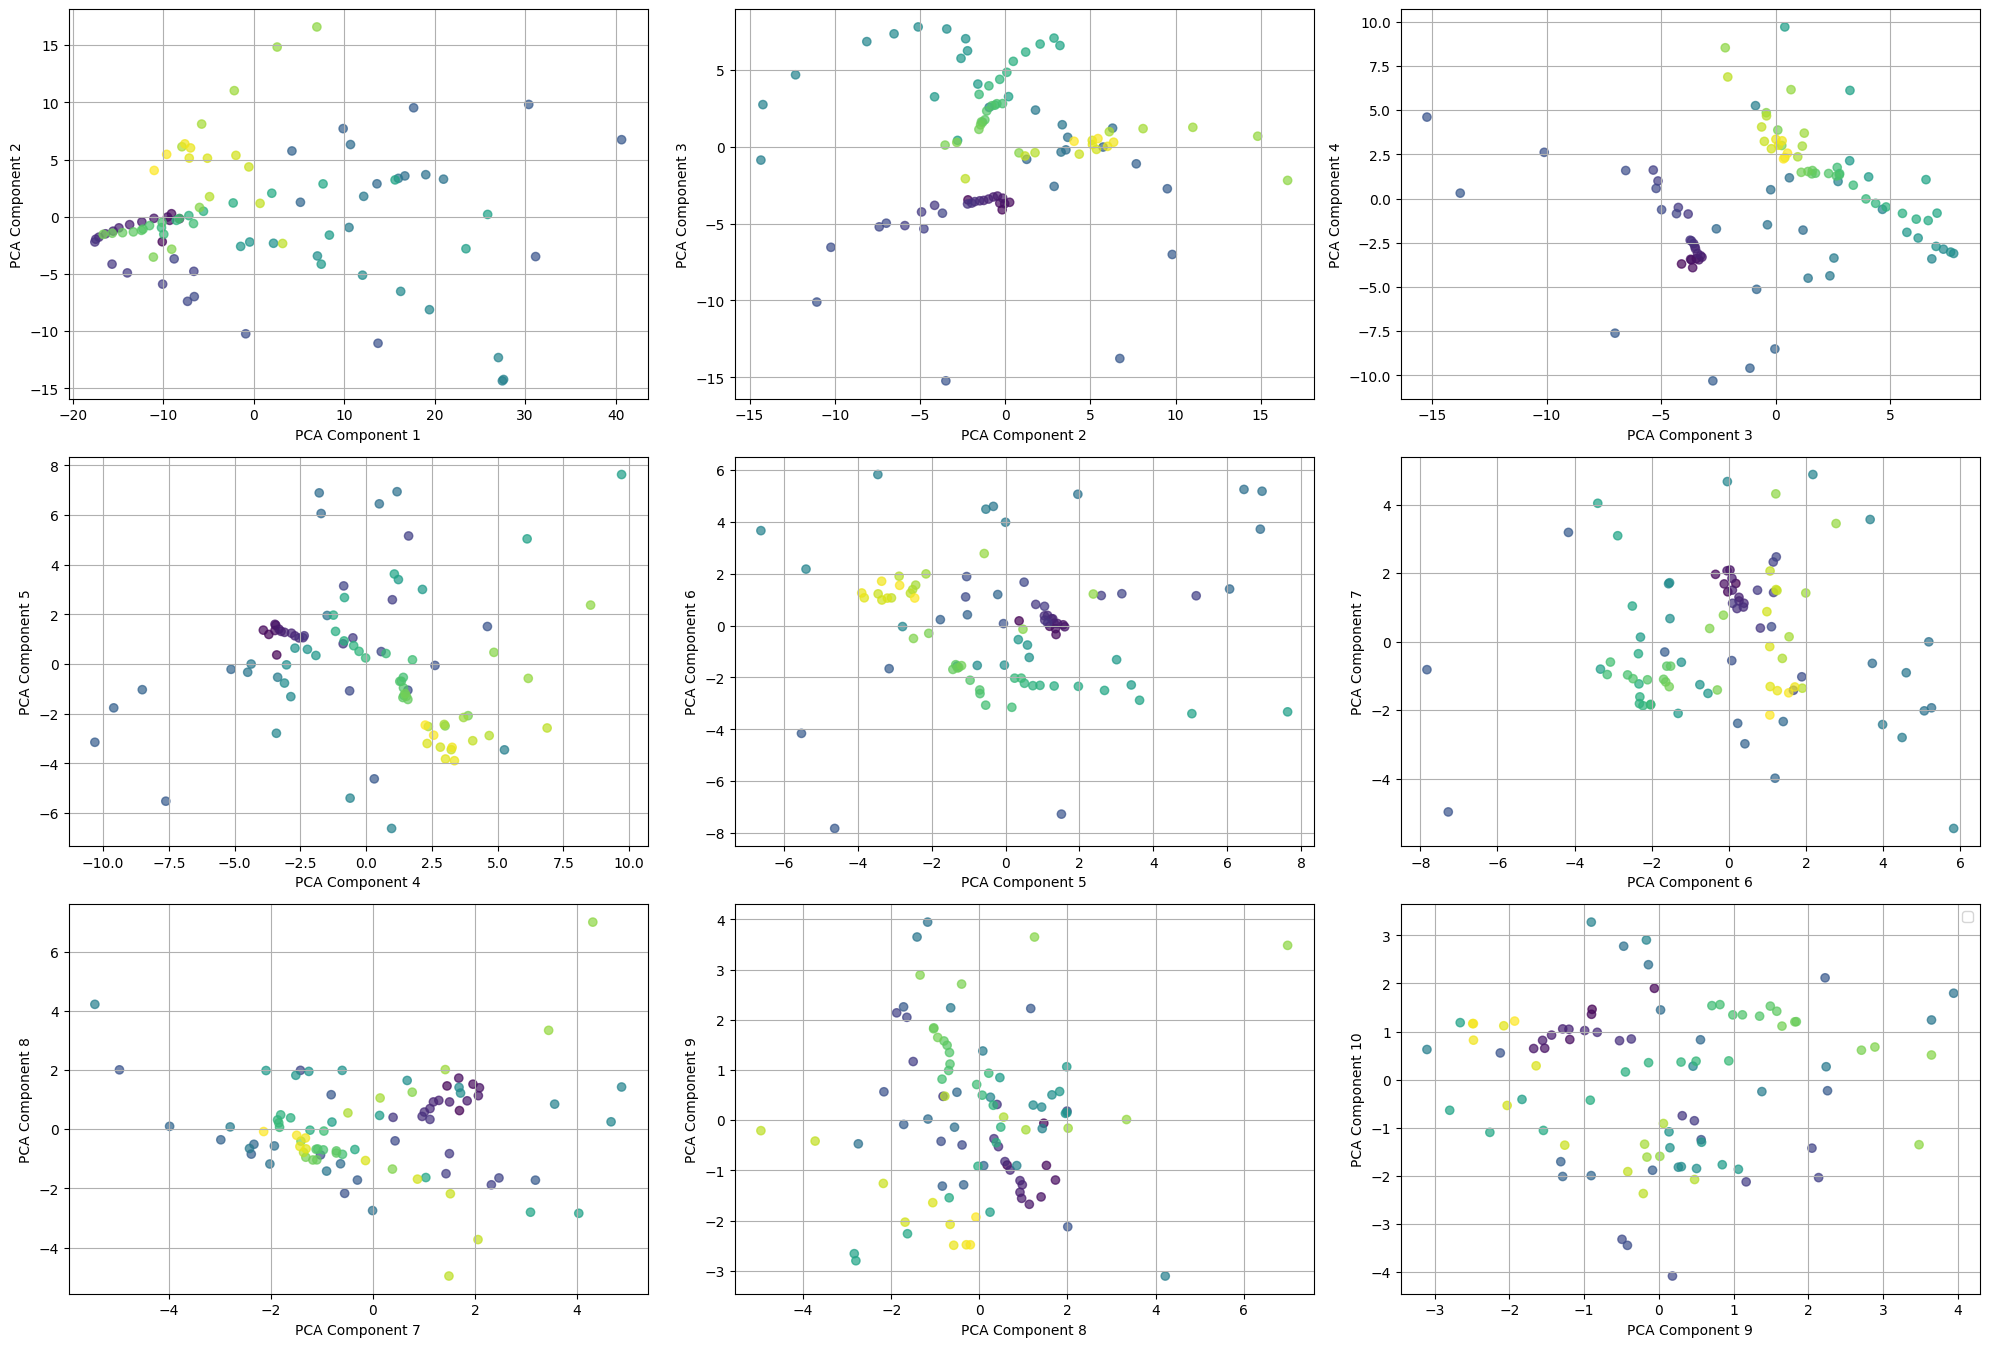

In [133]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [134]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.237
KMeans Davies-Bouldin Index is 1.443


<Axes: xlabel='k'>

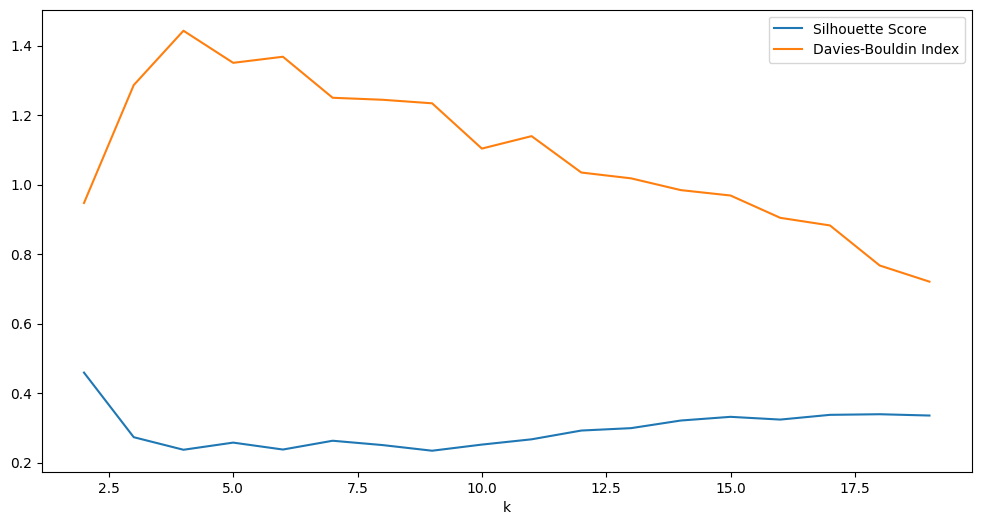

In [135]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     90               NaN   
1    0.76            3         0     90               NaN   
2    1.01            3         1     86               NaN   
3    1.27            3         2     80         -0.099412   
4    1.52            3         4     73         -0.051584   
5    1.78            3         3     71         -0.011525   
6    2.03            3         3     65          0.007163   
7    2.29            3         3     65          0.007163   
8    2.54            3         3     63          0.020064   
9    2.80            3         4     58          0.053986   
10   3.05            3         4     58          0.053986   
11   3.31            3         5     54          0.014857   
12   3.56            3         5     53          0.022547   
13   3.82            3         5     51          0.041965   
14   4.07            3         5     49          0.050958   
15   4.33            3         4     47          0.082631   
16   4.58            3         4     46          0.084178   
17   4.84            3         5     42          0.103972   
18   5.09            3         5     42          0.103972   
19   5.35            3         6     36          0.070903   
20   5.60            3         6     35          0.080144   
21   5.86            3         6     31          0.107420   
22   6.11            3         5     31          0.130620   
23   6.37            3         5     28          0.126480   
24   6.62            3         4     28          0.082673   
25   6.88            3         5     24          0.112289   
26   7.13            3         5     24          0.112289   
27   7.39            3         5     22          0.127288   
28   7.64            3         5     21          0.133972   
29   7.90            3         5     18          0.106619   
30   8.15            3         4     18          0.076156   
31   8.41            3         5     15          0.086438   
32   8.66            3         5     13          0.080621   
33   8.92            3         4     12          0.193731   
34   9.17            3         4     11          0.202631   
35   9.43            3         4     10          0.260163   
36   9.68            3         3     10          0.268143   
37   9.94            3         2     10          0.324384   
38  10.19            3         2     10          0.324384   
39  10.45            3         2     10          0.324384   
40  10.70            3         2     10          0.324384   
41  10.96            3         1      9               NaN   
42  11.21            3         1      7               NaN   
43  11.47            3         1      7               NaN   
44  11.72            3         1      7               NaN   
45  11.98            3         1      7               NaN   
46  12.23            3         1      7               NaN   
47  12.49            3         1      7               NaN   
48  12.74            3         1      7               NaN   
49  13.00            3         1      7               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3               1.032593  
4               1.004060  
5               1.033353  
6               1.123514  
7               1.123514  
8               1.122097  
9               1.067997  
10              1.067997  
11              1.255464  
12              1.256892  
13              1.242565  
14              1.266447  
15              1.236867  
16              1.255749  
17              1.147252  
18              1.147252  
19              1.534600  
20              1.565305  
21              1.622478  
22              1.657454  
23              1.751528  
24              1.849862  
25              1.729114  
26              1.729114  
27              1.813587  
28              1.769358  
29              1.603148  
30              1.507481  
31              1.488064  
32 

<Axes: xlabel='eps'>

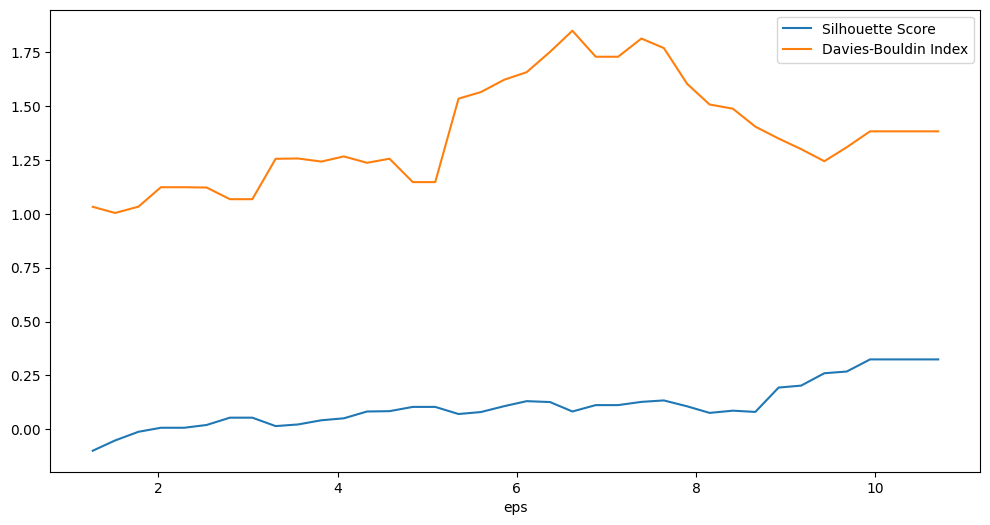

In [136]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

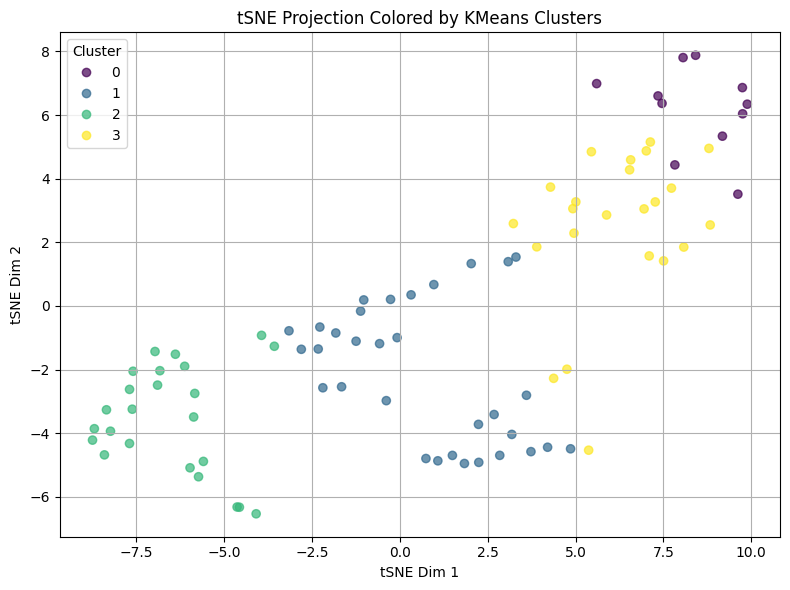

In [137]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2        18    249          0.751271   
1    0.05            2        25    231          0.670137   
2    0.06            2        28    222          0.585215   
3    0.06            2        28    210          0.527229   
4    0.07            2        29    205          0.499848   
..    ...          ...       ...    ...               ...   
195  0.98            2         2      1          0.778879   
196  0.99            2         2      1          0.778879   
197  0.99            2         2      1          0.778879   
198  1.00            2         2      1          0.778879   
199  1.00            2         2      1          0.778879   

     Davies-Bouldin Index  
0                0.283249  
1                0.342790  
2                0.412447  
3                0.413571  
4                0.431822  
..                    ...  
195              0.228849  
196              0.228849  
197              0.228849  
198              0.228849  
199              0.228849  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

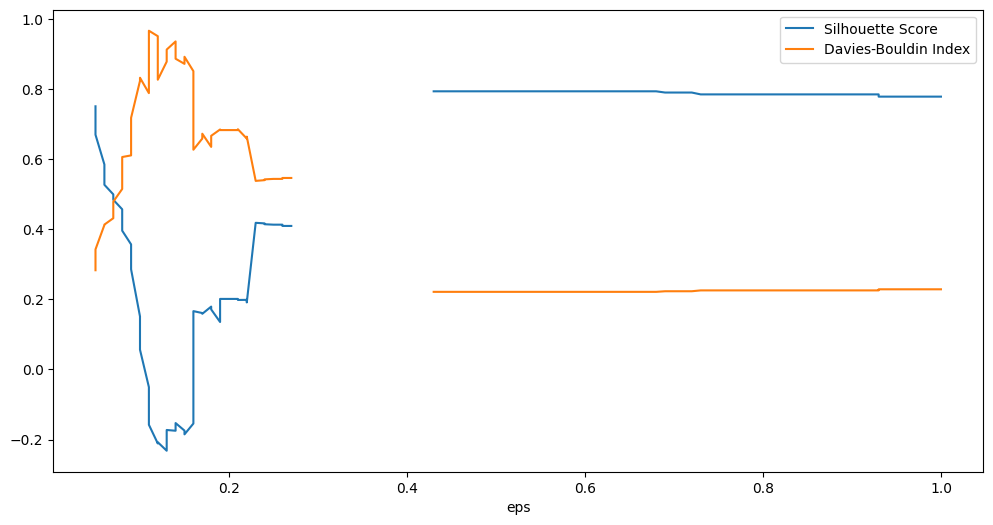

In [138]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))